In [1]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
%load_ext tikzmagic
#from __future__ import print_function
import tikzmagic

from IPython.display import display, Math, Markdown, Latex
import numpy as np
from fractions import Fraction


def get_StrfromFraction(fract):
    F = Fraction(fract).limit_denominator()
    return "{0:}".format(F)

def printMatrixFraction(MatrixF,width=5):
    for r_i in range(MatrixF.shape[0]):
        for c_i in range(MatrixF.shape[1]):
            col_width = max([len(get_StrfromFraction(a)) for a in MatrixF[:,c_i]])
            if col_width > width:
                if c_i>0: print(" ",end = "")
                print(("{0:<"+str(col_width)+"}").format(get_StrfromFraction(MatrixF[r_i][c_i])), end = "") 
            else:
                if c_i>0: print(" ",end = "")
                print( ("{0:"+str(width)+"}").format(get_StrfromFraction(MatrixF[r_i][c_i])), end = "")
        print()

def stable_matrix(P0, last, printYes = None):
    P_next = np.copy(P0)
    for i in range(1,last+1): 
        P_next = P_next.dot(P0)
    return P_next

def printMatrixs(matrixS, width=8, prec=6): 
    raw_counts = max([len(a) for a in matrixS])
    for i in range(0,raw_counts):
        for A in matrixS: 
            if len(A)>=i: printMatrix(A,i, width, prec)
        print()

def printMatrix(matrixA,raw_current, width, prec):
    print("[", end = "") #spec = "{:<"+str(col_width)+"G}"
    for j in range (len(matrixA[raw_current])): 
        col_width = max([len("{:g}".format(a)) for a in  matrixA[:,j]])
        if col_width <= width:
            if j>0: print(" ",end = "") 
            print( ("{:<"+str(col_width)+"g}").format(matrixA[raw_current][j]), end = "") 
        else:
            if j>0: print(" ",end = "") 
            print( ("{:"+str(width)+"."+str(prec)+"f}").format(matrixA[raw_current][j]), end = "") 
    print("]", end = "")
##################################################
import notebook
from jupyter_core.paths import jupyter_config_dir, jupyter_config_path
print(jupyter_config_dir())
print(jupyter_config_path())
#help("modules")   
import sys             
import os
print('\n'.join(sys.path), "\ncurrent folder ==",os.getcwd())
#https://sites.google.com/site/kochiuyu/Tikz
#%https://share.cocalc.com/share/96fd2324ae3de4c1f97ef1a116a87fd0839c3c2b/tikzimpatient.ipynb?viewer=share

C:\Users\polit\.jupyter
['C:\\Users\\polit\\.jupyter', 'd:\\html_doc\\math\\probability\\markov_chains\\env\\etc\\jupyter', 'C:\\ProgramData\\jupyter']
D:\HTML_DOC\Math\Probability\Markov_Chains\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\math\probability\markov_chains\env

d:\html_doc\math\probability\markov_chains\env\lib\site-packages
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\pip-20.2b1-py3.8.egg
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\win32
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\win32\lib
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\Pythonwin
d:\html_doc\math\probability\markov_chains\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython 
current folder == D:\HTML_DOC\Math\Probability\Markov_Chains\env


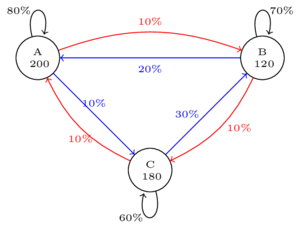

In [2]:
%%tikz -s 300,300

\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (0,0) (A) {A 200};
\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (4,0) (B) {B 120};
\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (2,-2)(C) {C 180};

\path (A) edge [loop above, left]  node {\tiny 80\%}(A);
\path (B) edge [loop above, right] node {\tiny 70\%}(B);
\path (C) edge [loop below, left]  node {\tiny 60\%}(C);

\draw[->][red] (A) edge [bend left=20,above] node {\tiny 10\%}(B);
\draw[->][blue](B) edge [below] node {\tiny 20\%}(A);
\draw[->][red] (B) edge [bend left=20,right] node {\tiny 10\%}(C);
\draw[->][blue](C) edge [left]  node {\tiny 30\%}(B);
\draw[->][red] (C) edge [bend left=20,below] node {\tiny 10\%}(A);
\draw[->][blue](A) edge [above] node {\tiny 10\%}(C);

%#https://youtu.be/Uz3JIp6EvIg

### [Prob & Stats - Markov Chains (1 of 38) What are Markov Chains: An Introduction](https://youtu.be/Uz3JIp6EvIg)

$$
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\quad
% -----------------------
% X0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[X_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
0.40 & A=200\\ 
0.24 & B=120\\
\underline{0.36} & \underline{C=180}\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0 & \hphantom{\text{A==}} 500\end{matrix}
%This is the super matrix
\end{matrix}
$$

$$\boxed{\left[\substack{\text{Next State}\\ \text{Future State}}\right] = 
\left[
\substack{\text{Matrix of}\\ \text{Transition}\\ \text{Probabilities}}
\right]
*[\text{Current State}]}
$$

$$[X_1] = [P]*[X_0]$$

$% -----------------------
% X1 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[X_1\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
% Sign Multiplication
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\begin{matrix}*\end{matrix}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}0.40 & A=200\\ 0.24 & B=120\\ \underline{0.36} & \underline{C=180}\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0 & \hphantom{\text{A==}} 500\end{matrix}
%This is the super matrix
\end{matrix}
% -----------------------
% Sign =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\begin{matrix}=\end{matrix}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\overbrace{
\left[
\begin{array}{ccccc}
0.8*0.4 &+ 0.2*0.24 &+  0.1*0.36\\
0.1*0.4 &+ 0.7*0.24 &+  0.3*0.36\\
0.1*0.4 &+ 0.1*0.24 &+  0.6*0.36
\end{array}
\right]}^{X_1}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
% -----------------------
% Sign =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\begin{matrix}=\end{matrix}
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$


$% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[X_1\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_1}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}0.404 & A=202\\ 0.316 & B=158\\ \underline{0.280} & \underline{C=140}\end{matrix}
\right]}^{X_1}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0 & \hphantom{\text{A==}} 500\end{matrix}
%This is the super matrix
\end{matrix}
$

### [Prob & Stats - Markov Chains (2 of 38) Markov Chains: An Introduction (Another Method)](https://youtu.be/3P8ZIIYgpvc)

### [Prob & Stats - Markov Chains (3 of 38) Why Are Markov Chains Called "Markov Chains"?](https://youtu.be/ECrsoUtsKq0)


$[X_1] = [P]*[X_0] \qquad [X_2] = [P]*[X_1] \qquad  [X_3] = [P]*[X_2] \qquad  [X_4] = [P]*[X_3]$


$[X_1] =  
%----------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_1}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\begin{bmatrix}
0.404\\
0.316\\
\underline{0.280}
\end{bmatrix}}^{X_1}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
%============================
=
%----------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{
\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
\\
%(3 third-line, 1column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
\end{matrix} %This is the super matrix
%==============================
%-------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
0.40\\
0.24\\
\underline{0.36}
\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
%=========================
\\
[X_2] =
\begin{matrix} %This is the super matrix
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
\hphantom{0.404}\\
\hphantom{0.316}\\
\underline{\hphantom{0.280}}
\end{matrix}
\right]}^{X_2}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
%This is the super matrix
\end{matrix} %This is the super matrix
=
%-----------------------
\begin{matrix} %This is the super matrix
%(1 -line Actual matrix)
\overbrace{
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix}}^{P}
\\
%(2 -line)
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
\end{matrix} %This is the super matrix
%-------------------------
\begin{matrix} %This is the super matrix
%(1 -line)
\overbrace{
\left[
\begin{matrix}
0.404\\
0.316\\
\underline{0.280}
\end{matrix}
\right]}^{X_1}
\\
%(2-line)
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
=
%\begin{matrix} %This is the super matrix
%(1 -line Actual matrix)
\overbrace{
\begin{bmatrix}
0.8*0.404 &+ 0.2*0.316 &+ 0.1*0.280\\
0.1*0.404 &+ 0.7*0.316 &+ 0.3*0.280\\
0.1*0.404 &+ 0.1*0.316 &+ 0.6*0.280
\end{bmatrix}}^{X_2}
\\
%(2 -line)
\vphantom{0.1}
%\end{matrix} %This is the super matrix
$

$[X_2]  
=
%-------------------------
\begin{matrix} %This is the super matrix
%(1 -line)
\overbrace{
\left[
\begin{matrix}
0.4144\\
0.3456\\
\underline{0.2400}
\end{matrix}
\right]}^{X_2}
\\
%(2-line)
\begin{matrix} 1.0\end{matrix}
\end{matrix} %This is the super matrix
$

In [3]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
X1 = P0.dot(X0.T)
X2 = P0.dot(X1.T)
X3 = P0.dot(X2.T)
display(Math('X_0 ={0}'.format([i for i in X0])));print(X0)
print(X1)
print(X2)
print(X3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

<IPython.core.display.Math object>

[0.4  0.24 0.36]
[0.404 0.316 0.28 ]
[0.4144 0.3456 0.24  ]
[0.42464 0.35536 0.22   ]


### [Prob & Stats - Markov Chains (4 of 38) Another Way to Calculate the Markov Chains](https://youtu.be/bBZrKmP020c)

$\begin{matrix}
X_1 
&=
P \cdot X_0
&=
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.280
\end{bmatrix} %This is the super matrix
%========================
\\
X_2
&=
P \cdot X_1
&=
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.280
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.2400
\end{bmatrix} %This is the super matrix
%========================
\\
X_3 & = P \cdot X_2 &=
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.2400
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22000
\end{bmatrix} %This is the super matrix
%========================
\end{matrix}
$

$
\begin{matrix}
X_1 &= P^1 X_0 &=
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.280
\end{bmatrix} %This is the super matrix
%========================
\\
X_2 &= P^2 X_0 &=
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & P^2 & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.2400
\end{bmatrix} %This is the super matrix
%========================
\\
X_3 &= P^3 X_0 &=
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & P^3 & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%===============================================
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22000
\end{bmatrix} %This is the super matrix
%========================
\end{matrix}
$

$
\begin{matrix}
P^2 &= P\cdot P &=
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & \hphantom{0.7} & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%========================
\\
P^3 &= P^2\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & P^2 & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
\hphantom{0.8} & \hphantom{0.2} & \hphantom{0.1} \\
\hphantom{0.1} & \hphantom{0.7} & \hphantom{0.3} \\
\hphantom{0.1} & \hphantom{0.1} & \hphantom{0.6}
\end{bmatrix} %This is the super matrix
%========================
\end{matrix}
$

In [4]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0);
printMatrixs([P0,P2,P3,P4]); print(X0)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.8 0.2 0.1][0.67 0.31 0.2][0.587 0.371 0.28][0.5347 0.4051 0.338]
[0.1 0.7 0.3][0.18 0.54 0.4][0.238 0.454 0.42][0.2778 0.4074 0.412]
[0.1 0.1 0.6][0.15 0.15 0.4][0.175 0.175 0.3 ][0.1875 0.1875 0.25 ]
[0.4  0.24 0.36]


$
\begin{array}{}
P^2  &= P\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.67 & 0.31 & 0.2 \\
0.18 & 0.54 & 0.4 \\
0.15 & 0.15 & 0.4
\end{bmatrix} %This is the super matrix
%========================
\\
P^3 &= P^2\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.67 & 0.31 & 0.2 \\
0.18 & 0.54 & 0.4 \\
0.15 & 0.15 & 0.4
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.587 & 0.371 & 0.28\\
0.238 & 0.454 & 0.42 \\
0.175 & 0.175 & 0.30
\end{bmatrix} %This is the super matrix
%========================
\end{array}
$

In [5]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0);
X1 = P0.dot(X0); X2 = P2.dot(X0); X3 = P3.dot(X0);
print(X0); print(X1); print(X2); print(X3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.4  0.24 0.36]
[0.404 0.316 0.28 ]
[0.4144 0.3456 0.24  ]
[0.42464 0.35536 0.22   ]


$
\begin{array}{}
X_1 &= P^1\cdot X_0 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.28
\end{bmatrix} %This is the super matrix
%========================
\\
X_2 &= P^2\cdot X_0 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.67 & 0.31 & 0.2 \\
0.18 & 0.54 & 0.4 \\
0.15 & 0.15 & 0.4
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.24
\end{bmatrix} %This is the super matrix
%========================
\\
X_3 &= P^3\cdot X_0 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.587 & 0.371 & 0.28\\
0.238 & 0.454 & 0.42 \\
0.175 & 0.175 & 0.30
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22
\end{bmatrix} %This is the super matrix
%========================
\end{array}
$

### [Prob & Stats - Markov Chains (5 of 38) What Happens if the Markov Chain Continues?](https://youtu.be/9wBPa2eu_lc)

$
\begin{array}{}
X_1 &= P^1\cdot X_0 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.40\\
0.24\\
0.36
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.28
\end{bmatrix} %This is the super matrix
%========================
\\
X_2 &= P^1\cdot X_1 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.404\\
0.316\\
0.28
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.24
\end{bmatrix} %This is the super matrix
%========================
\\
X_3 &= P^1\cdot X_2 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4144\\
0.3456\\
0.24
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22
\end{bmatrix} %This is the super matrix
%========================
\end{array}
$

In [6]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
X1 = P0.dot(X0); X2 = P0.dot(X1); X3 = P0.dot(X2);
X4 = P0.dot(X3); X5 = P0.dot(X4); X6 = P0.dot(X5); X7 = P0.dot(X6); X8 = P0.dot(X7);
print("0=",X0); print("1=",X1); print("2=",X2); print("3=",X3)
print("4=",X4); print("5=",X5); print("6=",X6); print("7=",X7); print("8=",X8); 
hideMe="Yes" # hide this cell from show in Jupyter notebook

0= [0.4  0.24 0.36]
1= [0.404 0.316 0.28 ]
2= [0.4144 0.3456 0.24  ]
3= [0.42464 0.35536 0.22   ]
4= [0.432784 0.357216 0.21    ]
5= [0.4386704 0.3563296 0.205    ]
6= [0.44270224 0.35479776 0.2025    ]
7= [0.44537134 0.35337866 0.20125   ]
8= [0.44709781 0.35227719 0.200625  ]


$
\begin{array}{}
X_4 &= P^1\cdot X_3 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.42464\\
0.35536\\
0.22
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.432784\\
0.357216\\
0.21 
\end{bmatrix} %This is the super matrix
%========================
\\
X_5 &= P^1\cdot X_4 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.432784\\
0.357216\\
0.21 
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4386704\\
0.3563296\\
0.205
\end{bmatrix} %This is the super matrix
%========================
\\
X_6 &= P^1\cdot X_5 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4386704\\
0.3563296\\
0.205
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44270224\\
0.35479776\\
0.2025
\end{bmatrix} %This is the super matrix
%========================
\\
X_7 &= P^1\cdot X_6   &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44270224\\
0.35479776\\
0.2025
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44537134\\
0.35337866\\
0.20125
\end{bmatrix} %This is the super matrix
%========================
\\
X_8 &= P^1\cdot X_7 &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.7 & 0.3 \\
0.1 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44537134\\
0.35337866\\
0.20125
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44709781\\
0.35227719\\
0.200625
\end{bmatrix} %This is the super matrix
%========================
\end{array}
$

In [7]:
X0 = np.array([0.4, 0.24, 0.36])
P0 = np.array([[0.8, 0.2, 0.1], 
               [0.1, 0.7, 0.3], 
               [0.1, 0.1, 0.6]])
X_next = X0
for i in range(1,20):
    X_next = P0.dot(X_next)
    if i > 7: 
        print("{0:2}=".format(i), end ="")
        for j in X_next: print("{0:.4f} ".format(j), end ="")
        print()
hideMe="Yes" # hide this cell from show in Jupyter notebook

 8=0.4471 0.3523 0.2006 
 9=0.4482 0.3515 0.2003 
10=0.4489 0.3510 0.2002 
11=0.4493 0.3506 0.2001 
12=0.4496 0.3504 0.2000 
13=0.4497 0.3502 0.2000 
14=0.4498 0.3501 0.2000 
15=0.4499 0.3501 0.2000 
16=0.4499 0.3501 0.2000 
17=0.4500 0.3500 0.2000 
18=0.4500 0.3500 0.2000 
19=0.4500 0.3500 0.2000 


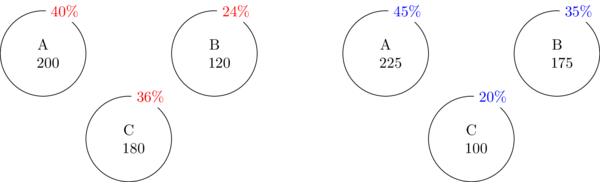

In [8]:
%%tikz -s 600,300

\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (0,0) (A) {A 200};
\node[red,anchor=base,text=red,fill=white] at (A.60)  {$40\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (4,0) (B) {B 120};
\node[red,anchor=base,text=red,fill=white] at (B.60)  {$24\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (2,-2)(C) {C 180};
\node[red,anchor=base,text=red,fill=white] at (C.60)  {$36\%$};

\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (8,0) (A2) {A 225};
\node[blue,anchor=base,text=blue,fill=white] at (A2.60)  {$45\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (12,0) (B2) {B 175};
\node[red,anchor=base,text=blue,fill=white] at (B2.60)  {$35\%$};
\node [circle, draw, align=center, text width=0.3cm, minimum size=2cm] at (10,-2)(C2) {C 100};
\node[red,anchor=base,text=blue,fill=white] at (C2.60)  {$20\%$};

### [Prob & Stats - Markov Chains (6 of 38) Markov Chain Applied to Market Penetration](https://youtu.be/xgvgN4fUqcs)

$
\begin{matrix}
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{
\begin{matrix}
A & \hphantom{\text{0.0}}B & \hphantom{\text{0.0}}C & \hphantom{\text{0.0}}D
\end{matrix}
}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.92 & 0.03 & 0.02 & 0.01\\
0.02 & 0.94 & 0.02 & 0.01\\
0.01 & 0.01 & 0.90 & 0.01\\
\underline{0.05} & \underline{0.02} & \underline{0.06} & \underline{0.97}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}
to A\\ 
to B\\ 
to C\\
to D
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{matrix}1.0 \hphantom{\text{0}}& 1.0 \hphantom{\text{0}}& 1.0 \hphantom{\text{0}}& 1.0
\end{matrix}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\quad
% -----------------------
% X0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[X_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
0.40\\ 
0.32\\
0.18\\
\underline{0.10}\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
%This is the super matrix
\end{matrix}
\qquad
% -----------------------
% XN =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[\bar{X}\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\vphantom{\begin{matrix}text{X_0}\end{matrix}}
\\
%(2 second-line,2 second-col)
\overbrace{
\left[
\begin{matrix}
0.161\\ 
0.179\\
0.091\\
\underline{0.569}\end{matrix}
\right]}^{X_0}
\\
%(3 third-line, 1 first-column )
\begin{matrix} 1.0\end{matrix}
%This is the super matrix
\end{matrix}
\end{matrix}
$

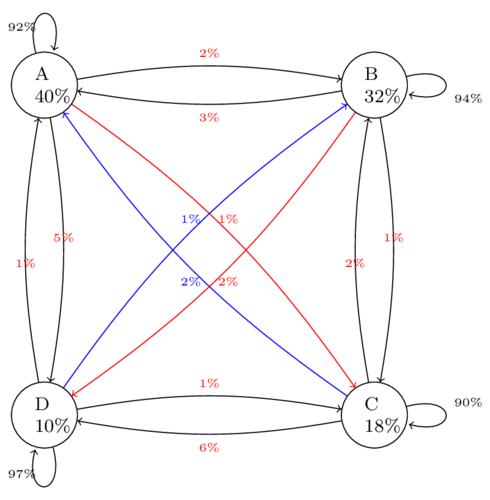

In [9]:
%%tikz -s 500,500

\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (0,0)  (A) {A 40\%};
\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (5,0)  (B) {B 32\%};
\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (5,-5) (C) {C 18\%};
\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (0,-5) (D) {D 10\%};

\draw[->](A) edge [bend left=10,above] node [red]{\tiny 2\%}(B);
\draw[->](B) edge [bend left=10,below] node [red]{\tiny 3\%}(A);

\draw[->](A) edge [red][bend left=10,above] node {\tiny 1\%}(C);
\draw[->](C) edge [blue][bend left=10,below] node {\tiny 2\%}(A);

\draw[->](A) edge [bend left=10,above] node [red]{\tiny 5\%}(D);
\draw[->](D) edge [bend left=10,below] node [red]{\tiny 1\%}(A);

\draw[->](B) edge [bend left=10,above] node [red]{\tiny 1\%}(C);
\draw[->](C) edge [bend left=10,below] node [red]{\tiny 2\%}(B);

\draw[->](B) edge [red][bend left=10,below] node {\tiny 2\%}(D);
\draw[->](D) edge [blue][bend left=10,above] node {\tiny 1\%}(B);

\draw[->](C) edge [bend left=10,below] node [red]{\tiny 6\%}(D);
\draw[->](D) edge [bend left=10,above] node [red]{\tiny 1\%}(C);

\path (A) edge [loop above, below left]  node {\tiny 92\%}(A);
\path (B) edge [loop right, below right] node {\tiny 94\%}(B);
\path (C) edge [loop right, above right] node {\tiny 90\%}(C);
\path (D) edge [loop below, above left]  node {\tiny 97\%}(D);

In [10]:
X0 = np.array([0.4, 0.32, 0.18, 0.10])
P0 = np.array([[0.92, 0.03, 0.02, 0.01],
               [0.02, 0.94, 0.02, 0.01],
               [0.01, 0.01, 0.90, 0.01],
               [0.05, 0.02, 0.06, 0.97]])
printMatrixs([P0]); print("X[0] =",X0)
X_next = X0
for i in range(1,260):
    X_next = P0.dot(X_next)
    if i %50 ==0: 
        print("X[{0:3}]: = ".format(i), end ="")
        for j in X_next: print("{0:.6f} ".format(j), end ="")
        print()
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.92 0.03 0.02 0.01]
[0.02 0.94 0.02 0.01]
[0.01 0.01 0.9  0.01]
[0.05 0.02 0.06 0.97]
X[0] = [0.4  0.32 0.18 0.1 ]
X[ 50]: = 0.167367 0.186412 0.091172 0.555050 
X[100]: = 0.161185 0.179146 0.090910 0.568760 
X[150]: = 0.160963 0.178850 0.090909 0.569278 
X[200]: = 0.160954 0.178838 0.090909 0.569299 
X[250]: = 0.160954 0.178838 0.090909 0.569300 


### [Prob & Stats - Markov Chains (7 of 38) Power of the Probability Matrix](https://youtu.be/KBCZ7o8XLKU)

$
\begin{array}{cclll}
P^2 &= P\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.66 & 0.17\\
0.34 & 0.83
\end{bmatrix} %This is the super matrix
%========================
\\
P^3 &= P^2\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.66 & 0.17\\
0.34 & 0.83
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.562 & 0.219\\
0.438 & 0.781
\end{bmatrix} %This is the super matrix
%========================
\\
P^4 &= P^3\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.562 & 0.219\\
0.438 & 0.781
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4934 & 0.2533\\
0.5066 & 0.7467
\end{bmatrix} %This is the super matrix
%========================
\\
P^5 &= P^4\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4934 & 0.2533\\
0.5066 & 0.7467
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.44538 0.27731\\
0.55462 0.72269
\end{bmatrix} %This is the super matrix
%========================
\\
P^6 &= P^5\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4934 & 0.2533\\
0.5066 & 0.7467
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.411766 & 0.294117\\
0.588234 & 0.705883
\end{bmatrix} %This is the super matrix
%========================
\\
\bar{P} &= \bar{P}\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
\bar{P}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%===============================================
\\
\end{array}
$

$
\bar{P} = \bar{P}\cdot P =
%-------------------------
\begin{bmatrix} %This is the super matrix
0.3333 & 0.3333\\
0.6667 & 0.6667
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.8 & 0.1\\
0.2 & 0.9
\end{bmatrix} %This is the super matrix
%===============================================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.3333 & 0.3333\\
0.6667 & 0.6667
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} & \dfrac{1}{3}\\
\dfrac{2}{3} & \dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
$

In [11]:
P0 = np.array([[0.8, 0.1],
               [0.2, 0.9]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0); P5 = P4.dot(P0); P6 = P5.dot(P0);
printMatrixs([P0,P2,P3,P4,P5,P6]);
P_next = P0
for i in range(1,66):
    P_next = P_next.dot(P0)
    if i %10 ==0: 
        print(i, "--------")
        printMatrixs([P_next]);
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.8 0.1][0.66 0.17][0.562 0.219][0.4934 0.2533][0.44538 0.27731][0.411766 0.294117]
[0.2 0.9][0.34 0.83][0.438 0.781][0.5066 0.7467][0.55462 0.72269][0.588234 0.705883]
10 --------
[0.346516 0.326742]
[0.653484 0.673258]
20 --------
[0.333706 0.333147]
[0.666294 0.666853]
30 --------
[0.333344 0.333328]
[0.666656 0.666672]
40 --------
[0.333334 0.333333]
[0.666666 0.666667]
50 --------
[0.333333 0.333333]
[0.666667 0.666667]
60 --------
[0.333333 0.333333]
[0.666667 0.666667]
1/3 1/3
2/3 2/3


$
\bar{P} \cdot X_0 = ? = \bar{X} \qquad \text{Stable distribution matrix}
$

$
\begin{matrix}
X_0 = 
%-------------------------
\begin{bmatrix} %This is the super matrix
1\\
0
\end{bmatrix} %This is the super matrix
%========================
\quad \bar{P}X_0 =
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} & \dfrac{1}{3}\\
\dfrac{2}{3} & \dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0\\
1
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} \cdot 1 + \dfrac{1}{3} \cdot 0\\
\dfrac{2}{3} \cdot 1 + \dfrac{2}{3} \cdot 0
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} + 0\\
\dfrac{2}{3} + 0
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
1/3\\
2/3
\end{bmatrix} %This is the super matrix
%========================
&= \bar{X}
\\
X_0 =
%-------------------------
\begin{bmatrix} %This is the super matrix
0.5\\
0.5
\end{bmatrix} %This is the super matrix
%========================
\quad
\bar{P}X_0 =
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} & \dfrac{1}{3}\\
\dfrac{2}{3} & \dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.5\\
0.5
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} \dfrac{1}{2} + \dfrac{1}{3} \dfrac{1}{2}\\
\dfrac{2}{3} \dfrac{1}{2} + \dfrac{2}{3} \dfrac{1}{2}
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{6} + \dfrac{1}{6}\\
\dfrac{1}{3} + \dfrac{1}{3}
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
1/3\\
2/3
\end{bmatrix} %This is the super matrix
%========================
&= \bar{X}
\\
X_0 = 
%-------------------------
\begin{bmatrix} %This is the super matrix
0\\
1
\end{bmatrix} %This is the super matrix
%========================
\quad
\bar{P}X_0 =
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} & \dfrac{1}{3}\\
\dfrac{2}{3} & \dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0\\
1
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} \cdot 0 + \dfrac{1}{3} \cdot 1\\
\dfrac{2}{3} \cdot 0 + \dfrac{2}{3} \cdot 1
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
0 + \dfrac{1}{3}\\
0 + \dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
1/3\\
2/3
\end{bmatrix} %This is the super matrix
%========================
&= \bar{X}
\end{matrix}
$

### [Prob & Stats - Markov Chains (8 of 38) What is a Stochastic Matrix?](https://youtu.be/VXntl6MqRIo)

### [Prob & Stats - Markov Chains (9 of 38) What is a Regular Matrix?](https://youtu.be/YMUwWV1IGdk)

### [Prob & Stats - Markov Chains (10 of 38) Regular Markov Chain](https://youtu.be/loBUEME5chQ)


$$ P^n \cdot X_0 = \bar{X} - \text{Stable Distribution Matrix}$$

$$
P_0 =
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4 & 0.3\\
0.6 & 0.7
\end{bmatrix} %This is the super matrix
%========================
,\qquad
X_0 = 
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4\\
0.6
\end{bmatrix} %This is the super matrix
%========================
$$

$P, \quad P^2, \quad P^3, \quad P^4, \quad P^5, \quad P^6, \quad \cdots, \quad \text{as Regular Markov chain}$

$
\begin{array}{cccll}
P^2 &= P\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4 & 0.3\\
0.6 & 0.7
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.4 & 0.3\\
0.6 & 0.7
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.34 & 0.33\\
0.66 & 0.67
\end{bmatrix} %This is the super matrix
%========================
\\
P^3 &= P^2\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.34 & 0.33\\
0.66 & 0.67
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.4 & 0.3\\
0.6 & 0.7
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.334 & 0.333\\
0.666 & 0.667
\end{bmatrix} %This is the super matrix
%========================
\\
P^4 &= P^3\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.334 & 0.333\\
0.666 & 0.667
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.4 & 0.3\\
0.6 & 0.7
\end{bmatrix} %This is the super matrix
%===============================================
&=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.3334 & 0.3333\\
0.6666 & 0.6667
\end{bmatrix} %This is the super matrix
%========================
\\
\bar{P} &= \bar{P}\cdot P &=
%-------------------------
\begin{bmatrix} %This is the super matrix
\bar{P}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.4 & 0.3\\
0.6 & 0.7
\end{bmatrix} %This is the super matrix
%===============================================
&= 
\text{Stable Matrix}
\end{array}
$

$
\bar{P} = \bar{P}\cdot P =
%-------------------------
\begin{bmatrix} %This is the super matrix
0.3333 & 0.3333\\
0.6667 & 0.6667
\end{bmatrix} %This is the super matrix
%========================
\cdot
%------------------------------------------------
\begin{bmatrix} %This is the super matrix
0.4 & 0.3\\
0.6 & 0.7
\end{bmatrix} %This is the super matrix
%===============================================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
0.3333 & 0.3333\\
0.6667 & 0.6667
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} & \dfrac{1}{3}\\
\dfrac{2}{3} & \dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
$

$$
P^4 \cdot X_0 = 
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3} & \dfrac{1}{3}\\
\dfrac{2}{3} & \dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
\cdot
%-------------------------
\begin{bmatrix} %This is the super matrix
0.4\\
0.6
\end{bmatrix} %This is the super matrix
%========================
=
%-------------------------
\begin{bmatrix} %This is the super matrix
\dfrac{1}{3}\\
\dfrac{2}{3}
\end{bmatrix} %This is the super matrix
%========================
$$

In [12]:
P0 = np.array([[0.4, 0.3],
               [0.6, 0.7]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0); P5 = P4.dot(P0); P6 = P5.dot(P0);
printMatrixs([P0,P2,P3,P4,P5,P6]);
P_next = P0
for i in range(1,8):
    P_next = P_next.dot(P0)
    if i >4: 
        print(i+1, "--------")
        printMatrixs([P_next]);
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.4 0.3][0.34 0.33][0.334 0.333][0.3334 0.3333][0.33334 0.33333][0.333334 0.333333]
[0.6 0.7][0.66 0.67][0.666 0.667][0.6666 0.6667][0.66666 0.66667][0.666666 0.666667]
6 --------
[0.333334 0.333333]
[0.666666 0.666667]
7 --------
[0.333333 0.333333]
[0.666667 0.666667]
8 --------
[0.333333 0.333333]
[0.666667 0.666667]
1/3 1/3
2/3 2/3


### [Prob & Stats - Markov Chains (11 of 38) How to Check for a Stable Distribution Matrix](https://youtu.be/DeG8MlORxRA)

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B\end{matrix}}^{\text{FROM}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.5 & 0.25\\
\underline{0.5} & \underline{0.75}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B \end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{cc}1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$
X_0 =
\begin{bmatrix} %This is the super matrix
0.4\\
0.6
\end{bmatrix} %This is the super matrix
$$

Is the $\bar{P} = \begin{bmatrix}\frac{1}{3} & \frac{1}{3}\\\frac{2}{3} & \frac{2}{3}\end{bmatrix}$ is **Stable Matrix** ?

Is the $\bar{X} = \begin{bmatrix}\frac{1}{3}\\\frac{2}{3}\end{bmatrix}$ is **Stable Distribution Matrix** ?

Checking:

$$P \cdot \bar{X} =  \bar{X}$$

$$\begin{bmatrix}0.5 & 0.25\\0.5 & 0.75\end{bmatrix} \cdot \begin{bmatrix}0.333\\0.667\end{bmatrix} = \begin{bmatrix}\frac{1}{3}\\\frac{2}{3}\end{bmatrix}
$$

Checking:

$$\bar{P} \cdot X_0 =  \bar{X}$$

$$\begin{bmatrix}\frac{1}{3} & \frac{1}{3}\\\frac{2}{3} & \frac{2}{3}\end{bmatrix} \cdot \begin{bmatrix}0.4\\0.6\end{bmatrix} = \begin{bmatrix}\frac{1}{3}\\\frac{2}{3}\end{bmatrix}
$$

In [13]:
X0 = np.array([0.4, 0.6])
P0 = np.array([[0.5, 0.25],
               [0.5, 0.75]])
P_Stable = np.array([[1/3, 1/3],
                     [2/3, 2/3]])
X_stable = np.array([1/3, 2/3])

P_next = stable_matrix(P0, 1200)
printMatrixs([P_Stable,P_next,P_Stable-P_next]);

X_next = P_Stable.dot(X0) 
print(X_stable, X_next, X_stable -X_next)
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.333333 0.333333][0.333333 0.333333][-0.000000 0.000000]
[0.666667 0.666667][0.666667 0.666667][-0.000000 -0.000000]
[0.33333333 0.66666667] [0.33333333 0.66666667] [0. 0.]
1/3 1/3
2/3 2/3


### [Prob & Stats - Markov Chains (12 of 38) How to Find a Stable 2x2 Matrix - Ex. 1](https://youtu.be/cSKXAaIhW6w)


$$
P_0 =
\begin{bmatrix} %This is the super matrix
0.5 & 0.25\\
0.5 & 0.75
\end{bmatrix} %This is the super matrix
,
X_0 =
\begin{bmatrix} %This is the super matrix
0.4\\
0.6
\end{bmatrix} %This is the super matrix
$$

$$
\bar{P} = ?
,
\bar{X} = ?
$$

$P \cdot \bar{X} = \begin{bmatrix}\bar{X}\end{bmatrix}$, Let $\bar{X} = \begin{bmatrix}A\\B\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
0.5 & 0.25\\
0.5 & 0.75
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
A\\
B
\end{bmatrix}
$


$
\begin{cases}
0.5 \cdot A + 0.25 \cdot B & =A\\
0.5 \cdot A + 0.75 \cdot B & = B\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = 4 \times ( A - 0.5 A )\\
0.5 A & = B  - 0.75 B\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = 2 A\\
A & = 0.5 B\\
A + 2 A & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
B & = 2 A\\
A & = \dfrac{1}{3}
\end{cases}
\Rightarrow
\begin{cases}
B & = \dfrac{2}{3}\\
A & = \dfrac{1}{3}
\end{cases}
$

$$
\bar{X} = 
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
1/3\\
2/3
\end{bmatrix}
=
\begin{bmatrix}
0.33333333\\
0.66666667
\end{bmatrix}
$$

$$
\bar{P} = 
\begin{bmatrix}
\dfrac{1}{3} & \dfrac{1}{3}\\
\dfrac{2}{3} & \dfrac{2}{3}
\end{bmatrix}
$$

In [14]:
P0 = np.array([[0.5, 0.25],
               [0.5, 0.75]])
P_next = stable_matrix(P0, 1200)

P_next = stable_matrix(P0, 1200)
printMatrixs([P0,P_next]);
print(P_next[:,0]);
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.5 0.25][0.333333 0.333333]
[0.5 0.75][0.666667 0.666667]
[0.33333333 0.66666667]
1/3 1/3
2/3 2/3


### [Prob & Stats - Markov Chains (13 of 38) How to Find a Stable 2x2 Matrix - Ex. 2](https://youtu.be/C1hs3EQS_jo)

$$
P_0 =
\begin{bmatrix} %This is the super matrix
0.9 & 0.5\\
0.1 & 0.5
\end{bmatrix} %This is the super matrix
$$

$$
\bar{P} = ?
,
\bar{X} = ?
$$

$P \cdot \bar{X} = \bar{X}$, Let $\bar{X} = \begin{bmatrix}A\\B\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
0.9 & 0.5\\
0.1 & 0.5
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
A\\
B
\end{bmatrix}
$


$
\begin{cases}
0.9 \cdot A + 0.5 \cdot B & =A\\
0.1 \cdot A + 0.5 \cdot B & =B\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = 2 \times ( A - 0.9 A )\\
A & = 10 \times ( B  - 0.5 B )\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = 0.2 A\\
A & = 5 B\\
5 B + B & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
A & = 5 B\\
B & = \dfrac{1}{6}
\end{cases}
\Rightarrow
\begin{cases}
A & = \dfrac{5}{6}\\
B & = \dfrac{1}{6}
\end{cases}
$

$$
\bar{X} = 
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
5/6\\
1/6
\end{bmatrix}
=
\begin{bmatrix}
0.83333333\\
0.16666667
\end{bmatrix}
$$

$$
\bar{P} = 
\begin{bmatrix}
\frac{5}{6} & \frac{5}{6}\\
\frac{1}{6} & \frac{1}{6}
\end{bmatrix}
$$

In [15]:
P0 = np.array([[0.9, 0.5],
               [0.1, 0.5]])
P_next = stable_matrix(P0, 1200)
printMatrixs([P0,P_next]);
print(P_next[:,0]);
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.9 0.5][0.833333 0.833333]
[0.1 0.5][0.166667 0.166667]
[0.83333333 0.16666667]
5/6 5/6
1/6 1/6


### [Prob & Stats - Markov Chains (14 of 38) How to Find a Stable 2x2 Matrix - Ex. 3](https://youtu.be/vxdUtjoxWvE)

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.95 & 0.5\\
\underline{0.05} & \underline{0.5}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B \end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{cc}1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

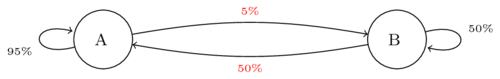

In [16]:
%%tikz -s 500,500

\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (0,0)  (A) {A };
\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (5,0)  (B) {B };

\draw[->](A) edge [bend left=10,above] node [red]{\tiny 5\%}(B);
\draw[->](B) edge [bend left=10,below] node [red]{\tiny 50\%}(A);

\path (A) edge [loop left,  below left]  node {\tiny 95\%}(A);
\path (B) edge [loop right, above right] node {\tiny 50\%}(B);

$$
\bar{P} = ?
,
\bar{X} = ?
$$

$P \cdot \bar{X} = \bar{X}$, Let $\bar{X} = \begin{bmatrix}A\\B\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
0.95 & 0.5\\
0.05 & 0.5
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
A\\
B
\end{bmatrix}
$


$
\begin{cases}
0.95 \cdot A + 0.5 \cdot B & =A\\
0.05 \cdot A + 0.5 \cdot B & =B\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = 2 \times ( A - 0.95 A )\\
A & = 20 \times ( B  - 0.5 B )\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = 0.1 A\\
A & = 10 B\\
10 B + B & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
A & = 10 B\\
B & = \dfrac{1}{11}
\end{cases}
\Rightarrow
\begin{cases}
A & = \dfrac{10}{11}\\
B & = \dfrac{1}{11}
\end{cases}
$

$$
\bar{X} = 
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
10/11\\
1/11
\end{bmatrix}
=
\begin{bmatrix}
0.909\\
0.091
\end{bmatrix}
$$

$$
\bar{P} = 
\begin{bmatrix}
\frac{10}{11} & \frac{10}{11}\\
\frac{1}{11} & \frac{1}{11}
\end{bmatrix}
=
\begin{bmatrix}
0.909 & 0.909\\
0.091 & 0.091
\end{bmatrix}
$$

In [17]:
P0 = np.array([[0.95, 0.5],
               [0.05, 0.5]])
P_next = stable_matrix(P0, 1200)
printMatrixs([P0,P_next]);
print(P_next[:,0])
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.95 0.5][0.909091 0.909091]
[0.05 0.5][0.090909 0.090909]
[0.90909091 0.09090909]
10/11 10/11
1/11  1/11 


### [Prob & Stats - Markov Chains (15 of 38) How to Find a Stable 3x3 Matrix](https://youtu.be/ZENBQj2qQ2k)


$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.3 \\
0.1 & 0.7 & 0.1 \\
\underline{0.1} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$
\bar{P} = ?
,
\bar{X} = ?
$$

$P \cdot \bar{X} = \bar{X}$, Let $\bar{X} = \begin{bmatrix}A\\B\\C\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.3\\
0.1 & 0.7 & 0.1\\
0.1 & 0.1 & 0.1
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
$

$
\begin{cases}
0.8 \cdot A + 0.2 \cdot B + 0.3 \cdot C & = A\\
0.1 \cdot A + 0.7 \cdot B + 0.1 \cdot C & = B\\
0.1 \cdot A + 0.1 \cdot B + 0.6 \cdot C & = C\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
0.2 B + 0.3 C & = A - 0.8 A\\
0.1 A + 0.7 B + 0.1 C & = B\\
0.1 A + 0.1 B + 0.6 C & = C\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
0.2 B + 0.3 C & = 0.2 A\\
A + 7 B + C & = 10 \cdot B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
2 B + 3 C & = 2 A\\
A + C & = 10 B - 7 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
B + \frac{3}{2} C & = A\\
A + C & = 3 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
B + \frac{3}{2} C & = A\\
(B + \frac{3}{2} C)+ C & = 3 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
B + \frac{3}{2} C & = A\\
\frac{3}{2} C + C & = 3 B - B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
B + \frac{3}{2} C & = A\\
\frac{5}{2} C     & = 2 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
B + \frac{3}{2} C & = A\\
C     & = \frac{4}{5} B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
B + \frac{3}{2} C & = A\\
C     & = \frac{4}{5} B\\
(B + \frac{3}{2} C) + B + (\frac{4}{5} B) & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
B + \frac{3}{2} C & = A\\
C     & = \frac{4}{5} B\\
\frac{5}{5} B + \frac{3}{2}(\frac{4}{5} B) + \frac{5}{5} B +  \frac{4}{5} B & = 1
\end{cases}
\Rightarrow
\begin{cases}
A & = B + \frac{3}{2} C\\
C     & = \frac{4}{5} B\\
\frac{20}{5} B & = 1
\end{cases}
\Rightarrow
\begin{cases}
A & = B + \frac{3}{2} C\\
C     & = \frac{4}{5} B\\
B & = \frac{1}{4}
\end{cases}
\Rightarrow
$

$
\begin{cases}
A & = \left(\frac{1}{4}\right) + \frac{3}{2} C\\
C & = \frac{4}{5} \left(\frac{1}{4}\right)\\
B & = \frac{1}{4}
\end{cases}
\Rightarrow
\begin{cases}
A & = \left(\frac{1}{4}\right) + \frac{3}{2} C\\
C & = \frac{1}{5}\\
B & = \frac{1}{4}
\end{cases}
\Rightarrow
\begin{cases}
A & = \left(\frac{1}{4}\right) \cdot \frac{5}{5} + \frac{3}{2}\left(\frac{1}{5}\right) \cdot \frac{2}{2}\\
C & = \left(\frac{1}{5}\right) \cdot  \frac{4}{4}\\
B & = \left(\frac{1}{4}\right) \cdot  \frac{5}{5}
\end{cases}
\Rightarrow
\begin{cases}
A & = \frac{5}{20} + \frac{6}{20}\\
B & = \frac{5}{20}\\
C & = \frac{4}{20}
\end{cases}
\Rightarrow
$

$$
\bar{X} = 
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
\frac{11}{20}\\
\frac{5}{20}\\
\frac{4}{20}
\end{bmatrix}
=
\begin{bmatrix}
0.55\\
0.25\\
0.20
\end{bmatrix}
$$

$$
\bar{P} = 
\begin{bmatrix}
\frac{11}{20} & \frac{11}{20} & \frac{11}{20}\\
\frac{5}{20} & \frac{5}{20} & \frac{5}{20}\\
\frac{4}{20}  & \frac{4}{20}  & \frac{4}{20}
\end{bmatrix}
$$

In [18]:
P0 = np.array([[0.8, 0.2, 0.3],
               [0.1, 0.7, 0.1],
               [0.1, 0.1, 0.6]])

P_next = stable_matrix(P0, 1200)
printMatrixs([P0,P_next]);
print(P_next[:,0])
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.8 0.2 0.3][0.55 0.55 0.55]
[0.1 0.7 0.1][0.25 0.25 0.25]
[0.1 0.1 0.6][0.2  0.2  0.2 ]
[0.55 0.25 0.2 ]
11/20 11/20 11/20
1/4   1/4   1/4  
1/5   1/5   1/5  


### [Prob & Stats - Markov Chains (16 of 38) Application Problem #1, Charity Contributions](https://youtu.be/87u7a2XGq1s)

***Charity contributions***
* of those who contribute 40% will not contribute next time
* of those who don't contribute 10% will not contribute next time

What is the Final Distribution matrix $\bar{X}$ = ?

***Благотворительный взнос***
* те кто вносит свой взнос 40% не будет участвовать в следующий раз
* те, кто не вносит взнос 10% не будет участвовать в следующий раз

Какая будет предельная/финальная Матрица распределения $\bar{X}$ =?

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}Not & Contr \end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
\hphantom{0.9} & 0.4\\
\underline{0.1} & \underline{\hphantom{0.6}}
\end{bmatrix} 
&
%(2 second-col)
\begin{array}{l}
\text{to Not contribute}\\
\text{to Contribute}
\end{array}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$


$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}Not & Contr \end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.9 & 0.4\\
\underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-col)
\begin{array}{l}
\text{to Not contribute}\\
\text{to Contribute}
\end{array}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$
\bar{P} = ?
,
\bar{X} = ?
$$

$P \cdot \bar{X} = \bar{X}$, Let $\bar{X} = \begin{bmatrix}N\\C\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
0.9 & 0.4\\
0.1 & 0.6
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
N\\
C
\end{bmatrix}
=
\begin{bmatrix}
N\\
C
\end{bmatrix}
$

$
\begin{cases}
0.9 \cdot N + 0.4 \cdot C & = N\\
0.1 \cdot N + 0.6 \cdot C & = C\\
N + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
\hphantom{N} &  \hphantom{= 4 C}\\
N + 6 C & = 10 C\\
N + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
\hphantom{N} &  \hphantom{= 4 C}\\
N & = 4 C\\
N + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
\hphantom{N} &  \hphantom{= 4 C}\\
N & = 4 C\\
(4 C) + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
N & = 4 C\\
5 C & = 1
\end{cases}
\Rightarrow
\begin{cases}
N & = 4 C\\
C & = \frac{1}{5}
\end{cases}
\Rightarrow
\begin{cases}
N & = 4 \cdot \left(\frac{1}{5}\right)\\
C & = \frac{1}{5}
\end{cases}
\Rightarrow
\begin{cases}
N & = \frac{4}{5}\\
C & = \frac{1}{5}
\end{cases}
$

$$
\bar{X} = 
\begin{bmatrix}
N\\
C
\end{bmatrix}
=
\begin{bmatrix}
\frac{4}{5}\\
\frac{1}{5}
\end{bmatrix}
=
\begin{bmatrix}
0.8\\
0.2
\end{bmatrix}
\begin{matrix}
\text{80%} \\
\text{20%}
\end{matrix}
$$

$$
\bar{P} = 
\begin{bmatrix}
\frac{4}{5} & \frac{4}{5}\\
\frac{1}{5} & \frac{1}{5}
\end{bmatrix}
$$

In [19]:
P0 = np.array([[0.9, 0.4],
               [0.1, 0.6]])

P_next = stable_matrix(P0, 1200)
printMatrixs([P0,P_next]);
print(P_next[:,0])
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.9 0.4][0.8 0.8]
[0.1 0.6][0.2 0.2]
[0.8 0.2]
4/5 4/5
1/5 1/5


### [Prob & Stats - Markov Chains (17 of 38) Application Problem #2, Grocery Stores](https://youtu.be/Na4m8HSpZSo)

2 Stores **A** and **B** :
* 30% of customers shopping at **A** will switch to **B** every nex month
* 20% of customers shopping at **B** will switch to **A** every nex month

2 Магазина **A** и **B** :
* 30% покупателей из магазина **A** переходят в магазин **B** каждый следущий месяц
* 30% покупателей из магазина **B** переходят в магазин **A** каждый следущий месяц

Какая будет предельная/финальная Матрица распределения $\bar{X}$ =?

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & B \end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
\hphantom{0.7} & 0.2\\
\underline{0.3} & \underline{\hphantom{0.8}}
\end{bmatrix} 
&
%(2 second-col)
\begin{array}{l}
\text{to A}\\
\text{to B}
\end{array}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

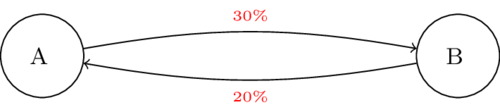

In [20]:
%%tikz -s 500,500

\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (0,0)  (A) {A };
\node [circle, draw, minimum size=1cm, text width=0.3cm, font=\footnotesize] at (5,0)  (B) {B };

\draw[->](A) edge [bend left=10,above] node [red]{\tiny 30\%}(B);
\draw[->](B) edge [bend left=10,below] node [red]{\tiny 20\%}(A);

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & B \end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.7 & 0.2\\
\underline{0.3} & \underline{0.8}
\end{bmatrix} 
&
%(2 second-col)
\begin{array}{l}
\text{to A}\\
\text{to B}
\end{array}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$
\bar{P} = ?
,
\bar{X} = ?
$$

$P \cdot \bar{X} = \bar{X}$, Let $\bar{X} = \begin{bmatrix}A\\B\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
0.7 & 0.2\\
0.3 & 0.8
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
A\\
B
\end{bmatrix}
$

$
\begin{cases}
0.7 \cdot A + 0.2 \cdot B & = A\\
0.3 \cdot A + 0.8 \cdot B & = B\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
7 A + 2 B & = 10 A\\
\hphantom{3A + 8B} & \hphantom{= 10B}\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
2 B & = 3 A\\
\hphantom{3 A } & \hphantom{= 2 B}\\
A + B & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = \frac{3}{2} A\\
\hphantom{3/2A} & \hphantom{= B}\\
A + B & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
B & = \frac{3}{2} A\\
A + \left(\frac{3}{2} A\right) & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = \frac{3}{2} A\\
\frac{5}{2} A & = 1
\end{cases}
\Rightarrow
\begin{cases}
B & = \frac{3}{2} \left(\frac{2}{5}\right)\\
A & = \frac{2}{5}
\end{cases}
\Rightarrow
\begin{cases}
A & = \frac{2}{5}\\
B & = \frac{3}{5}
\end{cases}
$

$$
\bar{X} = 
\begin{bmatrix}
A\\
B
\end{bmatrix}
=
\begin{bmatrix}
\frac{2}{5}\\
\frac{3}{5}
\end{bmatrix}
=
\begin{bmatrix}
0.4\\
0.6
\end{bmatrix}
\begin{matrix}
\text{40%} \\
\text{60%}
\end{matrix}
$$

$$
\bar{P} = 
\begin{bmatrix}
\frac{2}{5} & \frac{2}{5}\\
\frac{3}{5} & \frac{3}{5}
\end{bmatrix}
$$

In [21]:
P0 = np.array([[0.7, 0.2],
               [0.3, 0.8]])

P_next = stable_matrix(P0, 1200)
printMatrixs([P0,P_next]);
print(P_next[:,0])
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.7 0.2][0.4 0.4]
[0.3 0.8][0.6 0.6]
[0.4 0.6]
2/5 2/5
3/5 3/5


### [Prob & Stats - Markov Chains (18 of 38) Application Problem #3, Brand Loyalty](https://youtu.be/7_NI_9L35t0)

3 Brands **A**, **B** and **C**:
* 10% of **A** shoppers will switch to **B** and 10% to **C**
* 20% of **B** shoppers will switch to **A** and 10% to **C**
* 10% of **C** shoppers will switch to **A** and 10% to **B**

3 Бренда **A**, **B** и **C**:
* 10% покупателей **A** будут покупать **B** и 10% на **C**
* 20% покупателей **B** будут покупать **A** и 10% на **C**
* 10% покупателей **C** будут покупать **A** и 10% на **B**

Какая будет предельная/финальная Матрица распределения $\bar{X}$ =?

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
\hphantom{0.8} & 0.2 & 0.1 \\
0.1 & \hphantom{0.6} & 0.2 \\
\underline{0.1} & \underline{0.2} & \underline{\hphantom{0.7}}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.8 & 0.2 & 0.1 \\
0.1 & 0.6 & 0.2 \\
\underline{0.1} & \underline{0.2} & \underline{0.7}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$
\bar{P} = ?
,
\bar{X} = ?
$$

$P \cdot \bar{X} = \bar{X}$, Let $\bar{X} = \begin{bmatrix}A\\B\\C\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.6 & 0.2 \\
0.1 & 0.2 & 0.7
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
$

$
\begin{cases}
0.8 \cdot A + 0.2 \cdot B + 0.1 \cdot C & = A\\
0.1 \cdot A + 0.6 \cdot B + 0.2 \cdot C & = B\\
0.1 \cdot A + 0.2 \cdot B + 0.7 \cdot C & = C\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
8 A + 2 B + C & = 10A\\
 A + 6 B + 2 C & = 10B\\
\hphantom{A + 2 B + 7 C} & \hphantom{= 10C}\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
C & = 10A - 8 A - 2 B\\
A + 2 C & = 10B - 6B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
2 A - 2 B = C\\
A + 2 C & = 4 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
2 A - 2 B & = C\\
A + 2(2 A - 2 B) & = 4 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
2 A - 2 B & = C\\
A + 4 A - 4 B & = 4 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
2 A - 2 B & = C\\
5 A  & = 8 B\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
2 A - 2 B & = C\\
\frac{5}{8} A  & = B\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
2 A - 2 \left(\frac{5}{8} A\right) & = C\\
B & =\frac{5}{8} A\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
\frac{16}{8} A - \frac{10}{8} A & = C\\
B & =\frac{5}{8} A\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
\frac{6}{8} A & = C\\
B & =\frac{5}{8} A\\
\frac{8}{8} A + \left(\frac{5}{8} A\right) + \left(\frac{6}{8} A\right) & = 1
\end{cases}
\Rightarrow
\begin{cases}
C & = \frac{6}{8} A\\
B & =\frac{5}{8} A\\
A & = \frac{8}{19}
\end{cases}
\Rightarrow
\begin{cases}
C & =\frac{6}{8} \left(\frac{8}{19}\right)\\
B & =\frac{5}{8} \left(\frac{8}{19}\right)\\
 A & = \frac{8}{19}
\end{cases}
\Rightarrow
\begin{cases}
A & = \frac{8}{19}\\
B & = \frac{5}{19}\\
C & = \frac{6}{19}\\
\end{cases}
$

$$
P_0 \cdot \bar{X} = \bar{X} =
\begin{bmatrix} %This is the super matrix
0.8 & 0.2 & 0.1 \\
0.1 & 0.6 & 0.2 \\
0.1 & 0.2 & 0.7
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
\frac{8}{19}\\
\frac{5}{19}\\
\frac{6}{19}\\
\end{bmatrix}
=
\begin{bmatrix}
0.42105263\\
0.26315789\\
0.31578947\\
\end{bmatrix}
$$

$$
\bar{P} =
\begin{bmatrix} %This is the super matrix
\frac{8}{19}, \frac{8}{19}, \frac{8}{19}\\
\frac{5}{19}, \frac{8}{19}, \frac{8}{19}\\
\frac{6}{19}, \frac{8}{19}, \frac{8}{19}\\
\end{bmatrix} %This is the super matrix
$$

In [22]:
P0 = np.array([[0.8, 0.2, 0.1],
               [0.1, 0.6, 0.2],
               [0.1, 0.2, 0.7]])
P_next = stable_matrix(P0, 1200)
printMatrixs([P0,P_next]);
print(P_next[:,0])
printMatrixFraction(P_next,width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.8 0.2 0.1][0.421053 0.421053 0.421053]
[0.1 0.6 0.2][0.263158 0.263158 0.263158]
[0.1 0.2 0.7][0.315789 0.315789 0.315789]
[0.42105263 0.26315789 0.31578947]
8/19 8/19 8/19
5/19 5/19 5/19
6/19 6/19 6/19


### [Prob & Stats - Markov Chains (19 of 38) Absorbing Markov Chains - Definition 1](https://youtu.be/bpWV66hnRvQ)

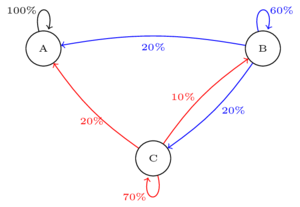

In [23]:
%%tikz -s 300,300

\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (0,0) (A) {A};
\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (4,0) (B) {B};
\node [circle, draw, align=center, text width=0.3cm, font=\tiny] at (2,-2)(C) {C};

\path (A) edge [loop above, left]  node {\tiny 100\%}(A);
\path (B)[blue] edge [loop above, right] node {\tiny 60\%}(B);
\path (C)[red] edge [loop below, left]  node {\tiny 70\%}(C);

\draw[->][blue](B) edge [bend right=10,below] node {\tiny 20\%}(A);
\draw[->][blue](B) edge [bend left=10,right] node {\tiny 20\%}(C);
\draw[->][red](C) edge [bend left=10,left]  node {\tiny 10\%}(B);
\draw[->][red](C) edge [bend left=10,below] node {\tiny 20\%}(A);

%#https://youtu.be/Uz3JIp6EvIg

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
1 & 0.2 & 0.2 \\
0 & 0.6 & 0.1 \\
\underline{0} & \underline{0.2} & \underline{0.7}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

In [24]:
P0 = np.array([[1.0, 0.2, 0.1],
               [0.0, 0.6, 0.2],
               [0.0, 0.2, 0.7]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0); P5 = P4.dot(P0); P6 = P5.dot(P0);
printMatrixs([P0,P2,P3,P4,P5]);
P_next = stable_matrix(P0, 1200)
printMatrixs([P_next], width =1, prec=0);
printMatrixFraction(P_next,width=1)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0.2 0.1][1 0.34 0.21][1 0.446 0.315][1 0.5306 0.4097][1 0.6003  0.49291]
[0 0.6 0.2][0 0.4  0.26][0 0.292 0.262][0 0.2276 0.2418][0 0.18492 0.21478]
[0 0.2 0.7][0 0.26 0.53][0 0.262 0.423][0 0.2418 0.3485][0 0.21478 0.29231]
[1 1 1]
[0 0 0]
[0 0 0]
1 1 1
0 0 0
0 0 0


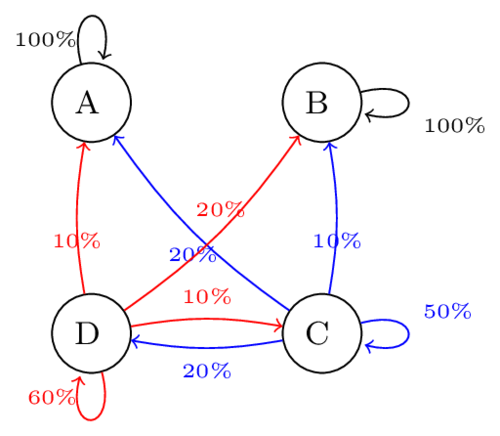

In [25]:
%%tikz -s 500,500

\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (0,0)  (A) {A};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (2,0)  (B) {B};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (2,-2) (C) {C};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (0,-2) (D) {D};

\path (A) edge [loop above, below left]  node {\tiny 100\%}(A);
\path (B) edge [loop right, below right] node {\tiny 100\%}(B);

\path (C) edge [blue][loop right, above right] node {\tiny 50\%}(C);
\draw[->](C) edge [blue][bend left=10,below] node {\tiny 20\%}(A);
\draw[->](C) edge [blue][bend right=10,below]node {\tiny 10\%}(B);
\draw[->](C) edge [blue][bend left=10,below] node {\tiny 20\%}(D);

\path (D) edge [red][loop below, above left]  node {\tiny 60\%}(D);
\draw[->](D) edge [red][bend left=10,below] node {\tiny 10\%}(A);
\draw[->](D) edge [red][bend right=10,above] node {\tiny 20\%}(B);
\draw[->](D) edge [red][bend left=10,above] node {\tiny 10\%}(C);

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & B & C \hphantom{\text{0.}} & D \hphantom{\text{0.}}\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
1 & 0 & 0.2 & 0.1\\
0 & 1 & 0.1 & 0.2\\
0 & 0 & 0.5 & 0.1\\
\underline{0} & \underline{0} & \underline{0.2} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}to A\\ to B\\ to C\\ to D\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1 & 1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

In [26]:
P0 = np.array([[1.0, 0.0, 0.2, 0.1],
               [0.0, 1.0, 0.1, 0.2],
               [0.0, 0.0, 0.5, 0.1],
               [0.0, 0.0, 0.2, 0.6]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0); P5 = P4.dot(P0); P6 = P5.dot(P0);
printMatrixs([P0,P2,P3,P4,P5]);
P_next = stable_matrix(P0, 1200)
printMatrixs([P_next], width =1, prec=0);
printMatrixFraction(P_next,width=1)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0 0.2 0.1][1 0 0.32 0.18][1 0 0.396 0.24 ][1 0 0.446  0.2836][1 0 0.47972 0.31476]
[0 1 0.1 0.2][0 1 0.19 0.33][0 1 0.261 0.417][0 1 0.3139 0.4763][0 1 0.35221 0.51717]
[0 0 0.5 0.1][0 0 0.27 0.11][0 0 0.157 0.093][0 0 0.0971 0.0715][0 0 0.06285 0.05261]
[0 0 0.2 0.6][0 0 0.22 0.38][0 0 0.186 0.25 ][0 0 0.143  0.1686][0 0 0.10522 0.11546]
[1 0 1 0]
[0 1 0 1]
[0 0 0 0]
[0 0 0 0]
1 0 5/9 7/18 
0 1 4/9 11/18
0 0 0   0    
0 0 0   0    


### [Prob & Stats - Markov Chains (20 of 38) Absorbing Markov Chains - Definition 2](https://youtu.be/S_QPpEELwZk)

Matrix of Transition Probabilities $P$:

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
P =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}S_1 & S_2 \hphantom{\text{0}}& S_3 \hphantom{\text{0}}& \ldots & S_n
\end{matrix}}^{\text{From}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
P_{11} & P_{12} & P_{13} & \ldots & P_{1n}\\
P_{21} & P_{22} & P_{23} & \ldots & P_{2n}\\
P_{31} & P_{32} & P_{33} & \ldots & P_{3n}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
\underline{P_{n1}} & \underline{P_{n2}} & \underline{P_{n3}} & \ldots & \underline{P_{nn}}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to }S_1\\
\text{to }S_2\\
\text{to }S_3\\
\vdots\\
\text{to }S_n\\
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{}1.0 & 1.0 & 1.0 & 1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$P_{ij}$ - Вероятность перехода из $S_j \longrightarrow S_i$.

Если $P_{ij} == 1$ значит состояние уже не меняется.

Если $P_{ij} == 1$ при $i == j$ и другие значения тогда $P_{ij} == 0$ получаем марковскую цепь с поглощением.



**Марковская цепь с поглощением:**
$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
P =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix} S_1 & S_2 & S_3\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
0.6 & 0 & 0.1 \\
0.3 & 1 & 0.2 \\
\underline{0.1} & \underline{0} & \underline{0.7}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } S_1\\
\text{to } S_2\\
\text{to } S_3
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$

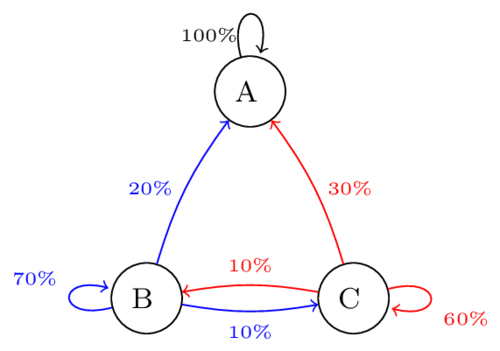

In [27]:
%%tikz -s 500,500

\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (1,0)  (A) {A};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (2,-2) (C) {C};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (0,-2) (B) {B};

\path (A) edge [loop above, below left]  node {\tiny 100\%}(A);

\path (C) edge [red][loop right, below right] node {\tiny 60\%}(C);
\draw[->](C) edge [red][bend right=10,right] node {\tiny 30\%}(A);
\draw[->](C) edge [red][bend right=10,above]node {\tiny 10\%}(B);

\path (B) edge [blue][loop left, above left] node {\tiny 70\%}(B);
\draw[->](B) edge [blue][bend left=10,left] node {\tiny 20\%}(A);
\draw[->](B) edge [blue][bend right=10,below]node {\tiny 10\%}(C);

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
\underline{0} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$
\bar{X} = ?
$$

$P \cdot \bar{X} = \bar{X}$, Let $\bar{X} = \begin{bmatrix}A\\B\\C\end{bmatrix}$ :

$
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
$

$
\begin{cases}
1 \cdot A + 0.2 \cdot B + 0.3 \cdot C & = A\\
0 \cdot A + 0.7 \cdot B + 0.1 \cdot C & = B\\
0 \cdot A + 0.1 \cdot B + 0.6 \cdot C & = C\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
A + 0.2 B + 0.3 C & = A\\
\hphantom{\text{A + }} 0.7 B + 0.1 C & = B\\
\hphantom{\text{A + }} 0.1 B + 0.6 C & = C\\
A + B + C & = 1
\end{cases}
\Rightarrow
\begin{cases}
A + 0.2 B + 0.3 C & = A\\
\hphantom{\text{A + }} 7 B +  C & = 10 B\\
\hphantom{\text{A + }}  B + 6 C & = 10 C\\
A + B + C & = 1
\end{cases}
\Rightarrow
$

$
\begin{cases}
A + 0.2 B + 0.3 C & = A\\
\hphantom{\text{A + }} C & = 3 B\\
\hphantom{\text{A + }} B & = 4 C\\
A + B + C & = 1
\end{cases}
\Rightarrow
\hphantom{\text{A + }}
\begin{cases}
C & = 3 B\\
C & = \frac{B}{4}\\
\end{cases}
\hphantom{\text{A + }}
\Rightarrow
\begin{cases}
?????\\
?????\\
\end{cases}
$

$C = 3 B$ и $C = \frac{B}{4}$ возможно только в одном случае, когда $B == 0$ и $C ==0$


$
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
\cdot
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
A\\
B\\
C
\end{bmatrix}
=
\begin{bmatrix}
1\\
0\\
0
\end{bmatrix}
$

### [Prob & Stats - Markov Chains (22 of 38) Absorbing Markov Chains - Example 2](https://youtu.be/1bErNmzD8Sw)

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
\left[P_0\right] =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{bmatrix}
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
\underline{0} & \underline{0.1} & \underline{0.6}
\end{bmatrix} 
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
$$

$$\bar{X} = ?$$

$$\bar{P} = ?$$:


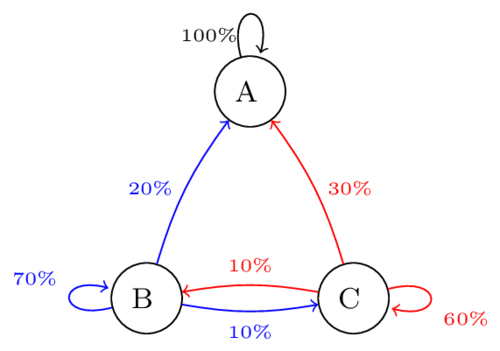

In [28]:
%%tikz -s 500,500

\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (1,0)  (A) {A};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (2,-2) (C) {C};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (0,-2) (B) {B};

\path (A) edge [loop above, below left]  node {\tiny 100\%}(A);

\path (C) edge [red][loop right, below right] node {\tiny 60\%}(C);
\draw[->](C) edge [red][bend right=10,right] node {\tiny 30\%}(A);
\draw[->](C) edge [red][bend right=10,above]node {\tiny 10\%}(B);

\path (B) edge [blue][loop left, above left] node {\tiny 70\%}(B);
\draw[->](B) edge [blue][bend left=10,left] node {\tiny 20\%}(A);
\draw[->](B) edge [blue][bend right=10,below]node {\tiny 10\%}(C);

In [29]:
P0 = np.array([[1.0, 0.2, 0.3],
               [0.0, 0.7, 0.1],
               [0.0, 0.1, 0.6]])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0); P5 = P4.dot(P0); P6 = P5.dot(P0);
printMatrixs([P0,P2,P3,P4,P5]);
P_next = stable_matrix(P0, 20)
print(P_next)
printMatrixs([P_next], width =1, prec=0);
printMatrixFraction(P_next,width=1)
print(P_next[:,0])
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0.2 0.3][1 0.37 0.5 ][1 0.509 0.637][1 0.62   0.7331][1 0.70731 0.80186]
[0 0.7 0.1][0 0.5  0.13][0 0.363 0.128][0 0.2669 0.1131][0 0.19814 0.09455]
[0 0.1 0.6][0 0.13 0.37][0 0.128 0.235][0 0.1131 0.1538][0 0.09455 0.10359]
[[1.00000000e+00 9.96135010e-01 9.97610450e-01]
 [0.00000000e+00 2.38954974e-03 1.47544012e-03]
 [0.00000000e+00 1.47544012e-03 9.14109625e-04]]
[1 1 1]
[0 0 0]
[0 0 0]
1 621394/623805 994876/997259
0 2383/997259   631/427669   
0 631/427669    865/946276   
[1. 0. 0.]


$
\begin{array}{}
P = & 
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
\\
P^2 = & 
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
& =
\begin{bmatrix} %This is the super matrix
1 & 0.37 & 0.5 \\
0 & 0.5  & 0.13 \\
0 & 0.13 & 0.37
\end{bmatrix} %This is the super matrix
\\
P^3 = & 
\begin{bmatrix} %This is the super matrix
1 & 0.37 & 0.5 \\
0 & 0.5  & 0.13\\
0 & 0.13 & 0.37
\end{bmatrix} %This is the super matrix
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
& =
\begin{bmatrix} %This is the super matrix
1 & 0.509 & 0.637 \\
0 & 0.363 & 0.128\\
0 & 0.128 & 0.235
\end{bmatrix} %This is the super matrix
\\
P^4 = & 
\begin{bmatrix} %This is the super matrix
1 & 0.509 & 0.637 \\
0 & 0.363 & 0.128\\
0 & 0.128 & 0.235
\end{bmatrix} %This is the super matrix
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
& =
\begin{bmatrix} %This is the super matrix
1 & 0.62   & 0.7331\\
0 & 0.2669 & 0.1131\\
0 & 0.1131 & 0.1538
\end{bmatrix} %This is the super matrix
\\
P^5 = & 
\begin{bmatrix} %This is the super matrix
1 & 0.62   & 0.7331\\
0 & 0.2669 & 0.1131\\
0 & 0.1131 & 0.1538
\end{bmatrix} %This is the super matrix
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
& =
\begin{bmatrix} %This is the super matrix
1 & 0.70731 & 0.80186\\
0 & 0.19814 & 0.09455\\
0 & 0.09455 & 0.10359
\end{bmatrix} %This is the super matrix
\\
\vdots & \vdots & \vdots
\end{array}{}
$

$
P^{20} = 
\begin{bmatrix} %This is the super matrix
1 & 0.99334084 & 0.99588146\\
0 & 0.00411854 & 0.00254062\\
0 & 0.00254062 & 0.00157792
\end{bmatrix} %This is the super matrix
\begin{bmatrix} %This is the super matrix
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
0 & 0.1 & 0.6
\end{bmatrix} %This is the super matrix
=
\begin{bmatrix} %This is the super matrix
1 & 0.99492673 & 0.99686296\\
0 & 0.00313704 & 0.00193623\\
0 & 0.00193623 & 0.00120081
\end{bmatrix} %This is the super matrix
$

$$
\bar{P} =  
\begin{bmatrix} %This is the super matrix
1 & 1 & 1\\
0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix} %This is the super matrix
\qquad
\bar{X} =  
\begin{bmatrix} %This is the super matrix
1\\
0\\
0
\end{bmatrix} %This is the super matrix
$$

### [Prob & Stats - Markov Chains (23 of 38) Absorbing and Non-Absorbing Markov Chain](https://youtu.be/hMceS_HIcKY)

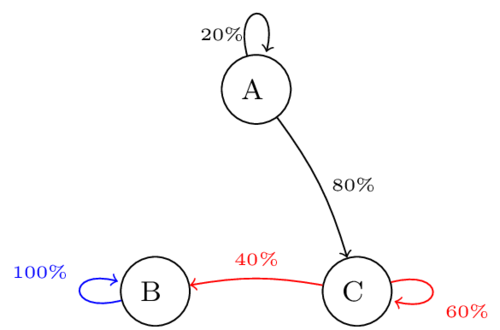

In [30]:
%%tikz -s 500,500

\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (1,0)  (A) {A};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (2,-2) (C) {C};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (0,-2) (B) {B};

\path (A) edge [loop above, below left]  node {\tiny 20\%}(A);
\draw[->](A) edge [bend left=10,right] node {\tiny 80\%}(C);

\path (C) edge [red][loop right, below right] node {\tiny 60\%}(C);
\draw[->](C) edge [red][bend right=10,above]node {\tiny 40\%}(B);

\path (B) edge [blue][loop left, above left] node {\tiny 100\%}(B);

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
P_0 =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{r|rr}
1 & 0.2 & 0.3 \\
0 & 0.7 & 0.1 \\
\underline{0} & \underline{0.1} & \underline{0.6}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\qquad
ABSORBING
$$

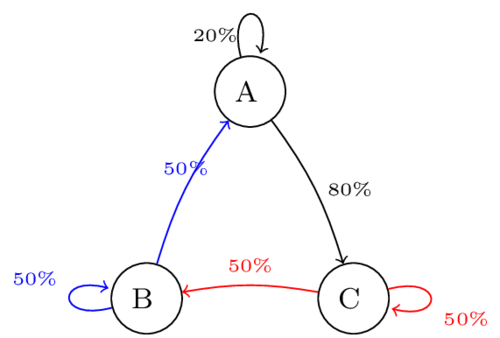

In [31]:
%%tikz -s 500,500

\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (1,0)  (A) {A};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (2,-2) (C) {C};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (0,-2) (B) {B};

\path (A) edge [loop above, below left]  node {\tiny 20\%}(A);
\draw[->](A) edge [bend left=10,right] node {\tiny 80\%}(C);

\path (C) edge [red][loop right, below right] node {\tiny 50\%}(C);
\draw[->](C) edge [red][bend right=10,above]node {\tiny 50\%}(B);

\path (B) edge [blue][loop left, above left] node {\tiny 50\%}(B);
\draw[->](B) edge [blue][bend left=10,above]node {\tiny 50\%}(A);

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
P_0 =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & \hphantom{\text{0.}}B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{lll}
0.2 & 0.5 & 0 \\
0 & 0.5 & 0.5 \\
\underline{0.8} & \underline{0} & \underline{0.5}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\qquad
NOT \qquad ABSORBING
$$

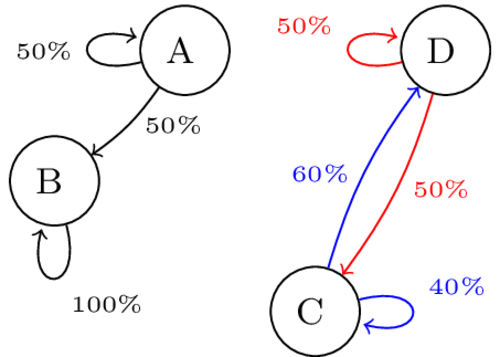

In [32]:
%%tikz -s 500,500

\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (1,0)  (A) {A};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (0,-1) (B) {B};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (3,0) (D) {D};
\node [circle, draw, minimum size=0.5cm, text width=0.3cm, font=\footnotesize] at (2,-2) (C) {C};


\path (A) edge [loop left, left]  node {\tiny 50\%}(A);
\draw[->](A) edge [bend left=10,right] node {\tiny 50\%}(B);

\path (B) edge [loop below, below right] node {\tiny 100\%}(B);


\path (C) edge [blue][loop right, above right] node {\tiny 40\%}(C);
\draw[->](C) edge [blue][bend left=10,left] node {\tiny 60\%}(D);

\path (D) edge [red][loop left, above left]  node {\tiny 50\%}(D);
\draw[->](D) edge [red][bend left=10,right] node {\tiny 50\%}(C);

$$
% -----------------------
% P0 =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
P_0 =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{
\begin{matrix}
A\hphantom{\text{0}} & B & C & D
\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{l:r:ll}
0.5 & 1 & 0 & 0 \\
0.5 & 0 & 0 & 0 \\
0   & 0 & 0.4 & 0.5 \\
\underline{0} & \underline{0} & \underline{0.6} & \underline{0.5}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C\\
\text{to } D
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\qquad
NOT \qquad ABSORBING
$$


In [33]:
P0 = np.array([[0.5, 1.0, 0.0, 0.0],
               [0.5, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.4, 0.5],
               [0.0, 0.0, 0.6, 0.5]              ])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0); P5 = P4.dot(P0); P6 = P5.dot(P0);
printMatrixs([P0,P2,P3,P4],width=5,prec=3);
P_next = stable_matrix(P0, 30)
print(P_next)
printMatrixs([P_next], width =1, prec=0);
print(P_next[:,0])
hideMe="Yes" # hide this cell from show in Jupyter notebook

[0.5 1 0   0  ][0.75 0.5 0    0   ][0.625 0.75 0     0    ][0.688 0.625 0.000 0.000]
[0.5 0 0   0  ][0.25 0.5 0    0   ][0.375 0.25 0     0    ][0.312 0.375 0.000 0.000]
[0   0 0.4 0.5][0    0   0.46 0.45][0     0    0.454 0.455][0.000 0     0.455 0.455]
[0   0 0.6 0.5][0    0   0.54 0.55][0     0    0.546 0.545][0.000 0     0.545 0.546]
[[0.66666667 0.66666667 0.         0.        ]
 [0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.45454545 0.45454545]
 [0.         0.         0.54545455 0.54545455]]
[1 1 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 1 1]
[0.66666667 0.33333333 0.         0.        ]


### [Prob & Stats - Markov Chains (24 of 38) Absorbing Markov Chain in Standard Form](https://youtu.be/UuZU3LUBalQ)

$$
% -----------------------
% P =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
P =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A \hphantom{\text{0.}}& B & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{l|l|l}
0.3   & 0 & 0 \\
\color{red}{0} & \color{red}{1} & \color{red}{0.6} \\
\underline{0.7} & \underline{0} & \underline{0.4}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1.0 & 1 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\Rightarrow
% -----------------------
% P =
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
P =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}\color{red}{B} \hphantom{\text{0.}}& A & \hphantom{\text{0.}}C\end{matrix}}^{P\text{:from}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{l|ll}
\color{red}{1} & \color{red}{0} & \color{red}{0.6}\\
0 & 0.3 & 0   \\
\underline{0} & \underline{0.7} & \underline{0.4}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\color{red}{\text{to } B}\\
\text{to } A\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\quad
{STANDART \\
Form\\
\quad\\
ABSORBING}
$$

$$
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line
P =
\\
%(3 third-line
\vphantom{\begin{matrix}\end{matrix}}
\end{matrix} %This is the super matrix
% ------------------------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{
\begin{matrix}\hphantom{\text{0}}A & B & \hphantom{\text{0}}C & D
\end{matrix}}^{\text{FROM}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{l|l|l|l}
0.4 & 0 & 0.3 & 0\\
\color{red}{0.3} & \color{red}{1} &\color{red}{0.4} & \color{red}{0}\\
0.1 & 0 & 0.2 & 0\\
\color{magenta}{\underline{0.2}} & \color{magenta}{\underline{0}} & \color{magenta}{\underline{0.1}} & \color{magenta}{\underline{1}}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C\\
\text{to } D
\end{matrix}
\\
%(3 third-line, 1 first-column )
\begin{array}{cccr}1.0 & 1 & 1.0 & 1 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
\end{matrix} %This is the super matrix
%==============================================
\Rightarrow
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line
P =
\\
%(3 third-line
\vphantom{\begin{matrix}\end{matrix}}
\end{matrix} %This is the super matrix
% ------------------------------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{
\begin{matrix}\color{red}{B} & \color{magenta}{D} & \hphantom{\text{0}} A & \hphantom{\text{0}} C
\end{matrix}}^{\text{FROM}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{l|l|ll}
\color{red}{1} & \color{red}{0} & \color{red}{0.3} & \color{red}{0.4}\\
\color{magenta}{0} & \color{magenta}{1} & \color{magenta}{0.2} & \color{magenta}{0.1}\\
0 & 0 & 0.4 & 0.3\\
\underline{0} & \underline{0} & \underline{0.1} & \underline{0.2}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\color{red}{\text{to } B}\\
\color{magenta}{\text{to } D}\\
\text{to } A\\
\text{to } C
\end{matrix}
\\
%(3 third-line, 1 first-column )
\begin{array}{cccr}1 & 1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
\end{matrix} %This is the super matrix
%==============================================
\quad
{STANDART \\
Form\\
\quad\\
ABSORBING}
$$

### [Prob & Stats - Markov Chains (25 of 38) Absorbing Markov Chain: Stable Matrix=?](https://youtu.be/bj_O4edCwgc)


$$
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line
P =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A \hphantom{\text{0.}}& B & \hphantom{\text{0.}}C\end{matrix}}^{\text{FROM}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{l|ll}
1 & 0.4 & 0.3 \\
0 & 0.3 & 0.2 \\
\underline{0} & \underline{0.3} & \underline{0.5}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
\end{matrix}%This is the super matrix
\Rightarrow
\qquad
\bar{P} =  
\begin{bmatrix} %This is the super matrix
1 & 1 & 1\\
0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix} %This is the super matrix
\qquad
\bar{X} =  
\begin{bmatrix} %This is the super matrix
1\\
0\\
0
\end{bmatrix} %This is the super matrix
=
\begin{bmatrix} %This is the super matrix
A\\
B\\
C
\end{bmatrix} %This is the super matrix
$$

$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\qquad
\qquad
\text{STANDART} \qquad\text{Form}
}
$$

$
P_0 =  
\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
=
\left[
\begin{array}{c:cc}
1 & 0.4 & 0.3\\  \hdashline
0 & 0.3 & 0.2\\
0 & 0.3 & 0.3\\
\end{array}
\right]
$

$
P_0
=
\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
=
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column)
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line,2 second-col)
=
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A & B & C \hphantom{\text{0.}} & D \hphantom{\text{0.}}\end{matrix}}^{\text{FROM}}
\end{matrix}
\\
%(2 second-line, 1 first-column) cell: Actual matrix
\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.1\\
0 & 1 & 0.1 & 0.2\\ \hdashline
0 & 0 & 0.5 & 0.1\\
\underline{0} & \underline{0} & \underline{0.2} & \underline{0.6}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C\\
\text{to } D
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1 & 1.0 & 1.0\end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix}
\qquad
\bar{X} =  
\begin{bmatrix} %This is the super matrix
1\\
1\\
0\\
0
\end{bmatrix} %This is the super matrix
=
\begin{bmatrix} %This is the super matrix
A\\
B\\
C\\
D\\
\end{bmatrix} %This is the super matrix
$

$
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.1\\
0 & 1 & 0.1 & 0.2\\ \hdashline
0 & 0 & 0.5 & 0.1\\
0 & 0 & 0.2 & 0.6
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
=
\left[
\begin{array}{cc:cc}
1 & 0 & ? & ?\\
0 & 1 & ? & ?\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
\end{array} %This is the super matrix
\right]
$

$
\boxed
{
P_0^1 
=
\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
}
=
\left[
\begin{array}{cc:cc}
1 & 0 & A & B\\
0 & 1 & C & D\\ \hdashline
0 & 0 & v & w\\
0 & 0 & x & z
\end{array}
\right]
$

$
P_0^2 
=
\left[
\begin{array}{cc}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
I & S\\
O & R\\
\end{array}
\right]
=
\left[
\begin{array}{c:c}
I \cdot I + S \cdot O & I \cdot S + S \cdot R\\ \hdashline
O \cdot I + R \cdot O & O \cdot S + R \cdot R\\
\end{array}
\right]
= 
\left[
\begin{array}{c:c}
I & S + S R\\ \hdashline
O & R^2
\end{array}
\right]
$

$
\boxed
{
P_0^2
=
\left[
\begin{array}{c:c}
I & S(I + R)\\ \hdashline
O & R^2\\
\end{array}
\right]
}
$

$
P_0 \cdot P_0
=
%\scriptsize
\left[
\begin{array}{cccc}
1 & 0 & A & B\\ \hdashline
0 & 1 & C & D\\ \hdashline
0 & 0 & v & w\\ \hdashline
0 & 0 & x & z
\end{array}
\right]
\left[
\begin{array}{c:c:c:c}
1 & 0 & A & B\\
0 & 1 & C & D\\
0 & 0 & v & w\\
0 & 0 & x & z
\end{array}
\right]
=
$

$
\scriptsize
=
\left[
\begin{array}{c:c:c:c}
1\cdot 1 + 0 \cdot 0 + A \cdot 0 + B \cdot 0 & 
1\cdot 0 + 0 \cdot 1 + A \cdot 0 + B \cdot 0 & 
1\cdot A + 0 \cdot C + A v + B x & 
1\cdot B + 0 \cdot D + A w + B z 
\\ \hdashline
0\cdot 1 + 1 \cdot 0 + C \cdot 0 + D \cdot 0 & 
0\cdot 0 + 1 \cdot 1 + C \cdot 0 + D \cdot 0 & 
0\cdot A + 1 \cdot C + C v + D x & 
0\cdot B + 1 \cdot D + C w + D z
\\ \hdashline
0\cdot 1 + 0 \cdot 0 + v \cdot 0 + w \cdot 0 & 
0\cdot 0 + 0 \cdot 1 + v \cdot 0 + w \cdot 0 & 
0\cdot A + 0 \cdot C + v v + w x & 
0\cdot B + 0 \cdot D + v w + w z
\\ \hdashline
0\cdot 1 + 0 \cdot 0 + x \cdot 0 + z \cdot 0 &
0\cdot 0 + 0 \cdot 1 + x \cdot 0 + z \cdot 0 &
0\cdot A + 0 \cdot C + x v + z x &
0\cdot B + 0 \cdot D + x w + z z
\end{array}
\right]
=
$

$$
=
\left[
\begin{array}{c:c:c:c}
1 & 0 & A   + A v + B x &  B + A w + B z \\ \hdashline
0 & 1 & C   + C v + D x &  D + C w + D z \\ \hdashline
0 & 0 & v^2 + w x       &  v w + w z     \\ \hdashline
0 & 0 & x v + z x       &  x w + z^2
\end{array}
\right]
$$

$
S \cdot R =
\left[
\begin{array}{c:c}
A & B \\ \hdashline
C & D
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
v & w \\
x & z
\end{array}
\right]
=
\left[
\begin{array}{c:c}
A v + B x & A w + B z\\ \hdashline
C v + D x & C w + D z
\end{array}
\right]
\\
\\
S + S\cdot R = 
\left[
\begin{array}{c:c}
A & B \\ \hdashline
C & D
\end{array}
\right]
+
\left[
\begin{array}{c:c}
A v + B x & A w + B z\\ \hdashline
C v + D x & C w + D z
\end{array}
\right]
=
$

$$
=
\boxed{
\left[
\begin{array}{c:c}
A + A v + B x & B + A w + B z\\ \hdashline
C + C v + D x & D + C w + D z
\end{array}
\right]
= S + S\cdot R
}
$$

$
R \cdot R
=
\left[
\begin{array}{cc}
v & w \\ \hdashline
x & z
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
v & w\\
x & z
\end{array}
\right]
=
\left[
\begin{array}{c:c}
v v + w x & v w + w z\\ \hdashline
x v + z x & x w + z z
\end{array}
\right]
=
$

$$
=
\boxed{
\left[
\begin{array}{c:c}
v^2 + w x & v w + w z\\ \hdashline
x v + z x & x w + z^2
\end{array}
\right]
=
R^2
}
$$

$
P_0^3
=
P_0^2
\cdot
\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
=
\left[
\begin{array}{c:c}
I & S + S \cdot R\\ \hdashline
O & R^2\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
=
$

$
=
\left[
\begin{array}{c:c}
I \cdot I + (S + SR) \cdot O & 
I \cdot S + (S + SR) \cdot R\\ \hdashline
O \cdot I + R^2 \cdot O 
& O \cdot S + R^2 \cdot R\\
\end{array}
\right]
=
\left[
\begin{array}{c:c}
I & S + SR + SR^2\\ \hdashline
O & R^3
\end{array}
\right]
=
$

$
\boxed
{
P_0^3
=
\left[
\begin{array}{c:c}
I & S(I + R + R^2) \\ \hdashline
O & R^3
\end{array}
\right]
}
$

$$
=
\left[
\begin{array}{c:c:c:c}
1 & 0 & (A   + A v + B x) &  (B + A w + B z) \\ \hdashline
0 & 1 & (C   + C v + D x) &  (D + C w + D z) \\ \hdashline
0 & 0 & (v^2 + w x)       &  (v w + w z)     \\ \hdashline
0 & 0 & (x v + z x)       &  (x w + z^2)
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c:c:c}
1 & 0 & A & B\\
0 & 1 & C & D\\
0 & 0 & v & w\\
0 & 0 & x & z
\end{array}
\right]
=
$$

$
P_0^4
=
P_0^3
\cdot
\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
=
\left[
\begin{array}{c:c}
I & S + S R + S R^2\\ \hdashline
O & R^3\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]
=
$

$
=
\left[
\begin{array}{c:c}
I \cdot I + (S + S R + S R^2)\cdot O & I \cdot S + (S + S R + S R^2) \cdot R\\ \hdashline
O \cdot I + R^3 \cdot O              & O \cdot S + R^3 \cdot R \\
\end{array}
\right]
=
\left[
\begin{array}{c:c}
I & S + SR + SR^2 + SR^3\\ \hdashline
O & R^4 \\
\end{array}
\right]
=
$

$
\boxed
{
P_0^4 =
\left[
\begin{array}{c:c}
I & S(I + R + R^2 + R^3)\\ \hdashline
O & R^4\\
\end{array}
\right]
}
$

$
\bar{P} 
= 
P_0^N
=
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S + S \cdot R + S \cdot R^2 + S \cdot R^3 + \cdots  + S \cdot R^{N-1}\\ \hdashline
O & R^N\\
\end{array}
\right]
=
$

$
\boxed
{
\bar{P} 
=
\left[
\begin{array}{c:c}
I & S(I + R + R^2 + R^3 + \cdots  + R^{N-1})\\ \hdashline
O & R^N\\
\end{array}
\right]
\Rightarrow
\left[
\begin{array}{c:c}
I & S(I - R)^{-1}\\ \hdashline
O & R^N\\
\end{array}
\right]
}
$

### [Геометрическая прогрессия](https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

**Геометри́ческая прогре́ссия** — последовательность чисел $\displaystyle b_{1}$, $\displaystyle b_{2}$, $\displaystyle b_{3}$, $\displaystyle \ldots $  (называемых членами прогрессии), в которой каждое последующее число, начиная со второго, получается из предыдущего умножением его на определённое число $\displaystyle q$ (называемое знаменателем прогрессии), где $\displaystyle b_{1}\neq 0$, $\displaystyle q\neq 0$: $\displaystyle b_{1}$, $\displaystyle b_{2}=b_{1}q$, $\displaystyle b_{3}=b_{2}q$, $\displaystyle \ldots$, $\displaystyle b_{n}=b_{n-1}q$

Любой член геометрической прогрессии может быть вычислен по формуле

$$
\displaystyle b_{n}=b_{1}q^{n-1}
$$

Если $\displaystyle b_{1}>0$ и $\displaystyle q>1$, прогрессия является ***возрастающей*** последовательностью, если $\displaystyle 0<q<1$, — ***убывающей*** последовательностью, а при $\displaystyle q<0$ — ***знакочередующейся***, при $\displaystyle q=1$ — ***стационарной***.

#### Сумма $\displaystyle n$ первых членов геометрической прогрессии

$
S_n = 
\begin{cases}
\sum \limits_{i=1}^n  b_i = \dfrac{ b_1 - b_1 q^n}{1-q}=\dfrac{ b_1 \left( 1 - q^n \right)}{ 1-q }, & \mbox{if } q \ne 1 \\
\\
n b_1, & \mbox{if } q = 1
\end{cases}
$

#### Сумма всех членов убывающей прогрессии:

$\left| q \right| < 1$ то то $\displaystyle b_{n}\to 0$ при  $\displaystyle n\to +\infty$, и

$S_n \to \frac{ b_1 }{ 1-q}$ при $n \to +\infty$

$
\begin{array}{}
S_n &= 1 &+ q &+ q^2 &+ q^3 &+ q^4 &+ \cdots &+ q^n\\
\\
q \cdot S_n &= 1 \cdot q  &+ q \cdot q &+ q^2 \cdot q &+ q^3 \cdot q & +q^4\cdot q &+ \cdots &+ q^n \cdot q\\
q S_n &= q  &+ q^2 &+ q^3 &+ q^4 &+ q^5 &+\cdots &+ q^{n+1} 
\\
\\
\text{Вычитаем:}\\
\\
S_n &= 1 &+ q &+ q^2 &+ q^3 &+ q^4 &+ \cdots &+ q^n\\
- & - & - & - & - & -& & -\\
q S_n       &= q       &+ q^2     &+ q^3     &+ q^4 &+ q^5 &+ \cdots &+ q^{n+1}\\ \hline
S_n - q S_n &= 1 \color{blue}{-q} &\color{blue}{+q} \color{red}{-q^2} & \color{red}{+q^2}
\color{green}{-q^3} & \color{green}{+q^3} \color{magenta}{-q^4} &\color{magenta}{+q^4} -q^5 &+\cdots &+ q^n -q^{n+1}\\\hdashline
\\
S_n(1 - q) &= 1  &\color{blue}{+0} &\color{red}{+0} &\color{green}{+0} &\color{magenta}{+0} +0& \cdots &+0 -q^{n+1}\\
S_n(1 - q) &= 1 - q^{n+1}
\end{array}
$

$$
\boxed{
S_n = \frac{1 - q^{n+1}} {1 - q}
}
$$

$S = \lim_{n\to\infty} S_n =  \lim_{n\to\infty} \dfrac{1-q^{n+1}}{1-q} = $

при $n\to\infty$ $q^{n+1}\to 0$:
$$\boxed{S = \dfrac{1}{1-q}}$$

$$I + R + R^2 + R^3 + \cdots  + R^{N-1} = \dfrac{1}{I-R} = (I-R)^{-1}$$

$
\boxed
{
\bar{P} 
=
\left[
\begin{array}{c:c}
I & S(I + R + R^2 + R^3 + \cdots  + R^{N-1})\\ \hdashline
O & R^N\\
\end{array}
\right]
=
\left[
\begin{array}{c:c}
I & S(I - R)^{-1}\\ \hdashline
O & R^N\\
\end{array}
\right]
}
$

### [Prob & Stats - Markov Chains (26 of 38) Absorbing Markov Chain: Stable Matrix=? Ex. 1](https://youtu.be/72Ipee3ueUs)

$$
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line
\\
\hphantom{\begin{matrix}\end{matrix}}
\\
%(2 second-line
P =
\\
%(3 third-line, 1 first-column )
\vphantom{\begin{matrix}\end{matrix}}
%This is the super matrix
\end{matrix} %This is the super matrix
% -----------------------
\begin{matrix} %This is the super matrix
%(1 first-line, 1 first-column) cell: Brace spanning columns
\begin{matrix}   %One-row matrix to hold the brace
\overbrace{\begin{matrix}A \hphantom{\text{0.}}& B & \hphantom{\text{0.}}C\end{matrix}}^{\text{FROM}}
\end{matrix}
\\
\left[
%(2 second-line, 1 first-column) cell: Actual matrix
\begin{array}{l:ll}
1 & 0.4 & 0.3 \\\hdashline
0 & 0.3 & 0.2 \\
\underline{0} & \underline{0.3} & \underline{0.5}
\end{array}
\right]
&
%(2 second-line,2 second-col)
\begin{matrix}
\text{to } A\\
\text{to } B\\
\text{to } C
\end{matrix}
%The inter-column spacing of the super matrix looks too big by default
%\mspace{-33mu}
\\
%(3 third-line, 1 first-column )
\begin{array}{lcr}1 & 1.0 & 1.0 \end{array}
&
%(3 third-line,2 second-col)
\vphantom{\begin{matrix}\end{matrix}}
\end{matrix}%This is the super matrix
\qquad\qquad
\bar{P} =  
\begin{bmatrix} %This is the super matrix
1 & 1 & 1\\
0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix} %This is the super matrix
\qquad
\bar{X} =  
\begin{bmatrix} %This is the super matrix
1\\
0\\
0
\end{bmatrix} %This is the super matrix
=
\begin{bmatrix} %This is the super matrix
A\\
B\\
C
\end{bmatrix} %This is the super matrix
$$


$
I - R = 
\begin{bmatrix} %This is the super matrix
1 & 0\\
0 & 1\\
\end{bmatrix} 
-
\begin{bmatrix}
0.3 & 0.2\\
0.3 & 0.5\\
\end{bmatrix} 
=
\begin{bmatrix} %This is the super matrix
1 - 0.3 & 0 - 0.2\\
0 - 0.3 & 1 - 0.5\\
\end{bmatrix} 
=
\begin{bmatrix} %This is the super matrix
0.7 & -0.2\\
-0.3 & 0.5\\
\end{bmatrix} 
$

Determinant $D = (0.7)\cdot (0.5) - (-0.2) \cdot (-0.3) = 0.35 - 0.06 = 0.29$

$
(I-R)^{-1}
= 
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\dfrac{1}{0.29} \cdot
\begin{bmatrix}
0.5 & 0.2\\
0.3 & 0.7\\
\end{bmatrix} 
$

In [34]:
def matrix_cofactor(matrix):
    return np.linalg.inv(matrix).T * np.linalg.det(matrix)

R = np.array([[ 0.3, 0.2],
              [ 0.3, 0.5]])

I = np.array([[1,0],
              [0,1]])
I_R = I - R
Determinant = np.linalg.det(I_R)
print("Determinant == {0:G} == {1}".format(Determinant, get_StrfromFraction(Determinant)))
printMatrixs([I, R, I_R], width =6, prec=4);

I_R_cofactor = matrix_cofactor(I_R)
print("cofactor:\n",I_R_cofactor)

I_R_cofactor_T = I_R_cofactor.T
print("cofactor.T\n",I_R_cofactor_T)

I_R_invert = I_R_cofactor_T/Determinant
print("A Inverted ==")
printMatrixs([I_R_invert], width =8, prec=6);

print("Checking: A*cofactor' A* A'(Inverted) \tA' - A'(fraction) ")
printMatrixs([I_R.dot(I_R_cofactor_T), I_R.dot(I_R_invert)], width =6, prec=2);
A_inv_frac = np.array([[5*10/29,  2*10/29],
                       [3*10/29,  7*10/29]])
printMatrixs([I_R_invert, A_inv_frac, I_R_invert - A_inv_frac], width =8, prec=6);
hideMe="Yes" # hide this cell from show in Jupyter notebook

Determinant == 0.29 == 29/100
[1 0][0.3 0.2][0.7  -0.2]
[0 1][0.3 0.5][-0.3 0.5 ]
cofactor:
 [[0.5 0.3]
 [0.2 0.7]]
cofactor.T
 [[0.5 0.2]
 [0.3 0.7]]
A Inverted ==
[1.72414 0.689655]
[1.03448 2.41379 ]
Checking: A*cofactor' A* A'(Inverted) 	A' - A'(fraction) 
[  0.29  -0.00][  1.00  -0.00]
[  0.00   0.29][  0.00   1.00]
[1.72414 0.689655][1.72414 0.689655][0 0.000000]
[1.03448 2.41379 ][1.03448 2.41379 ][0 0.000000]


$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
{\left[
\begin{array}{c:cc}
1 & 0.4 & 0.3\\  \hdashline
0 & 0.3 & 0.2\\
0 & 0.3 & 0.3\\
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\\
\\
I
=
\left[
\begin{array}{c}1\end{array}\right]
\qquad
O = 
\left[
\begin{array}{c}0\\0\end{array}\right]
\qquad
S = 
\left[
\begin{array}{cc}0.4 & 0.3\end{array}\right]
\qquad
R = 
\left[
\begin{array}{cc}0.3 & 0.2\\0.3 & 0.3\end{array}\right]
}
$$

#### через десятичные дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[\begin{array}{cc}0.4 & 0.3\end{array}\right]
\cdot
\dfrac{1}{0.29} 
\begin{bmatrix}
0.5 & 0.2\\
0.3 & 0.7\\
\end{bmatrix}
=
\dfrac{1}{0.29} 
\left[\begin{array}{cc}0.4 & 0.3\end{array}\right]
\cdot
\begin{bmatrix}
0.5 & 0.2\\
0.3 & 0.7\\
\end{bmatrix}
=
$

$
=
\dfrac{1}{0.29} 
\cdot
\left[\begin{array}{c:c}
0.4 \cdot 0.5 + 0.3 \cdot 0.3 & 0.4 \cdot 0.2 + 0.3 \cdot 0.7
\end{array}\right]
=
\dfrac{1}{0.29} 
\cdot
\left[\begin{array}{c:c}
0.20 + 0.09 & 0.08 + 0.21
\end{array}\right]
=
$

$
=
\dfrac{1}{0.29} 
\cdot
\left[\begin{array}{c:c}0.29 & 0.29\end{array}\right]
=
\left[\begin{array}{cc}1 & 1\end{array}\right]
$

$$
\boxed{S \cdot (I-R)^{-1} = \left[\begin{array}{c:c}1 & 1\end{array}\right]}
$$

#### через обычные дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[\begin{array}{cc}0.4 & 0.3\end{array}\right]
\cdot
\dfrac{1}{0.29} 
\begin{bmatrix}
0.5 & 0.2\\
0.3 & 0.7\\
\end{bmatrix}
=
$

$
=
\dfrac{1}{\frac{29}{100}} 
\cdot
\left[\begin{array}{cc}\dfrac{4}{10} & \dfrac{3}{10}\end{array}\right]
\cdot
\left[\begin{array}{c:c}
\dfrac{5}{10} & \dfrac{2}{10}\\
\dfrac{3}{10} & \dfrac{7}{10}\\
\end{array}\right]
=
\dfrac{1}{\frac{29}{100}} 
\cdot
\left[\begin{array}{c:c}
\dfrac{4}{10}\dfrac{5}{10} + \dfrac{3}{10}\dfrac{3}{10}& \dfrac{4}{10}\dfrac{2}{10} + \dfrac{3}{10} \dfrac{7}{10}
\end{array}\right]
=
$

$
\dfrac{1}{\frac{29}{100}} 
\cdot
\left[\begin{array}{c:c}
\dfrac{20 + 9}{100} & \dfrac{8 + 21}{100}
\end{array}\right]
=
\dfrac{1}{\frac{29}{100}} 
\cdot
\left[\begin{array}{c:c}
\dfrac{29}{100} & \dfrac{29}{100}
\end{array}\right]
=
\left[\begin{array}{c:c}
1 & 1
\end{array}\right]
$

$$
\boxed{S \cdot (I-R)^{-1} = \left[\begin{array}{c:c}1 & 1\end{array}\right]}
$$

$
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.1\\
0 & 1 & 0.1 & 0.2\\ \hdashline
0 & 0 & 0.5 & 0.1\\
0 & 0 & 0.2 & 0.6
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
=
\left[
\begin{array}{cc:cc}
1 & 0 & ? & ?\\
0 & 1 & ? & ?\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
\end{array} %This is the super matrix
\right]
$

In [35]:
P0 = np.array([[1.0, 0.0, 0.2, 0.1],
               [0.0, 1.0, 0.1, 0.2],
               [0.0, 0.0, 0.5, 0.1],
               [0.0, 0.0, 0.2, 0.6]              ])
P2 = P0.dot(P0); P3 = P2.dot(P0); P4 = P3.dot(P0); P5 = P4.dot(P0); P6 = P5.dot(P0);
printMatrixs([P0,P2,P3,P4],width=5,prec=3);

steps = 30
P_next = stable_matrix(P0, steps)
print("P({0}):".format(steps))
printMatrixs([P_next], width =1, prec=6);
print(P_next[:,2])

steps = 100
P_next = stable_matrix(P0, steps)
print("P({0}):".format(steps))
printMatrixs([P_next], width =1, prec=6);
printMatrixFraction(P_next,width=2)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0 0.2 0.1][1 0 0.32 0.18][1 0 0.396 0.24 ][1 0 0.446 0.284]
[0 1 0.1 0.2][0 1 0.19 0.33][0 1 0.261 0.417][0 1 0.314 0.476]
[0 0 0.5 0.1][0 0 0.27 0.11][0 0 0.157 0.093][0 0 0.097 0.071]
[0 0 0.2 0.6][0 0 0.22 0.38][0 0 0.186 0.25 ][0 0 0.143 0.169]
P(30):
[1 0 0.555549 0.388882]
[0 1 0.444436 0.611102]
[0 0 0.000005 0.000005]
[0 0 0.000011 0.000011]
[5.55548543e-01 4.44435679e-01 5.25917971e-06 1.05183585e-05]
P(100):
[1 0 0.555556 0.388889]
[0 1 0.444444 0.611111]
[0 0 0.000000 0.000000]
[0 0 0.000000 0.000000]
1  0  5/9 7/18 
0  1  4/9 11/18
0  0  0   0    
0  0  0   0    


$
(I - R) = 
\begin{bmatrix} %This is the super matrix
1 & 0\\
0 & 1\\
\end{bmatrix} 
-
\begin{bmatrix}
0.5 & 0.1\\
0.2 & 0.6\\
\end{bmatrix} 
=
\begin{bmatrix} %This is the super matrix
1 - 0.5 & 0 - 0.1\\
0 - 0.2 & 1 - 0.6\\
\end{bmatrix} 
=
\begin{bmatrix} %This is the super matrix
0.5 & -0.1\\
-0.2 & 0.4\\
\end{bmatrix} 
$

Determinant $D = (0.5)\cdot (0.4) - (-0.1) \cdot (-0.2) = 0.20 - 0.02 = 0.18$

$
(I-R)^{-1}
= 
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\dfrac{1}{0.18} \cdot
\begin{bmatrix}
0.4 & 0.1\\
0.2 & 0.5\\
\end{bmatrix} 
$

In [36]:
def matrix_cofactor(matrix):
    return np.linalg.inv(matrix).T * np.linalg.det(matrix)

R = np.array([[ 0.5, 0.1],
              [ 0.2, 0.6]])

I = np.array([[1,0],
              [0,1]])
I_R = I - R
printMatrixs([I, R, I_R], width =6, prec=4);
Determinant = np.linalg.det(I_R)
print("Determinant == {0:G} == {1}".format(Determinant, get_StrfromFraction(Determinant)))

I_R_cofactor = matrix_cofactor(I_R)
I_R_cofactor_T = I_R_cofactor.T
print("cofactor => cofactor.T ")
printMatrixs([I_R_cofactor, I_R_cofactor_T], width =8, prec=1);

I_R_invert = I_R_cofactor_T/Determinant
print("A Inverted ==")
printMatrixs([I_R_invert], width =8, prec=6);

S = np.array([[ 0.2, 0.1],
              [ 0.1, 0.2]])
print("S(I-R)^-1==")
printMatrixs([S.dot(I_R_cofactor_T/Determinant)], width =8, prec=6);
printMatrixFraction(S.dot(I_R_cofactor_T/Determinant),width=3)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0][0.5 0.1][0.5  -0.1]
[0 1][0.2 0.6][-0.2 0.4 ]
Determinant == 0.18 == 9/50
cofactor => cofactor.T 
[0.4 0.2][0.4 0.1]
[0.1 0.5][0.2 0.5]
A Inverted ==
[2.22222 0.555556]
[1.11111 2.77778 ]
S(I-R)^-1==
[0.555556 0.388889]
[0.444444 0.611111]
5/9 7/18 
4/9 11/18


$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.1\\
0 & 1 & 0.1 & 0.2\\ \hdashline
0 & 0 & 0.5 & 0.1\\
0 & 0 & 0.2 & 0.6
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\\
\\
I
=
\left[
\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}
\right]
\qquad
O = 
\left[
\begin{array}{cc}
0 & 0\\
0 & 0\\
\end{array}
\right] 
\qquad
S = 
\left[
\begin{array}{cc}
0.2 & 0.1\\
0.1 & 0.2\\
\end{array}
\right]
\qquad
R = 
\left[
\begin{array}{cc}
0.5 & 0.1\\
0.2 & 0.6\\
\end{array}
\right]
}
$$

$
(I-R)^{-1}
= 
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\dfrac{1}{0.18} \cdot
\begin{bmatrix}
0.4 & 0.1\\
0.2 & 0.5\\
\end{bmatrix} 
$

#### через десятичные дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[
\begin{array}{cc}
0.2 & 0.1\\
0.1 & 0.2\\
\end{array}
\right]
\cdot
\dfrac{1}{0.18} 
\begin{bmatrix}
0.4 & 0.1\\
0.2 & 0.5\\
\end{bmatrix}
=
\dfrac{1}{0.18} 
\left[
\begin{array}{cc}
0.2 & 0.1\\ \hdashline
0.1 & 0.2\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
0.4 & 0.1\\
0.2 & 0.5\\
\end{array}
\right]
=
$

$
=
\dfrac{1}{0.18} 
\cdot
\left[\begin{array}{c:c}
0.2 \cdot 0.4 + 0.1 \cdot 0.2 & 0.2 \cdot 0.1 + 0.1 \cdot 0.5\\
0.1 \cdot 0.4 + 0.2 \cdot 0.2 & 0.1 \cdot 0.1 + 0.2 \cdot 0.5\\
\end{array}\right]
=
\dfrac{1}{0.18} 
\cdot
\left[\begin{array}{c:c}
0.08 + 0.02 & 0.02 + 0.05\\
0.04 + 0.04 & 0.01 + 0.10\\
\end{array}
\right]
=
$

$
=
\dfrac{1}{0.18} 
\cdot
\left[\begin{array}{cc}
0.10 & 0.07\\
0.08 & 0.11\\
\end{array}
\right]
=
\left[\begin{array}{cc}
0.555556 & 0.388889\\
0.444444 & 0.611111\\
\end{array}
\right]
$

$$
\boxed{S \cdot (I-R)^{-1} = 
\left[\begin{array}{cc}
0.555556 & 0.388889\\
0.444444 & 0.611111\\
\end{array}
\right]
}
$$

#### через обычные дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[
\begin{array}{cc}
0.2 & 0.1\\
0.1 & 0.2\\
\end{array}
\right]
\cdot
\dfrac{1}{0.18} 
\begin{bmatrix}
0.4 & 0.1\\
0.2 & 0.5\\
\end{bmatrix}
=
\dfrac{1}{0.18} 
\left[
\begin{array}{cc}
0.2 & 0.1\\ \hdashline
0.1 & 0.2\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
0.4 & 0.1\\
0.2 & 0.5\\
\end{array}
\right]
=
$

$
=
\dfrac{1}{\frac{18}{100}} 
\cdot
\left[\begin{array}{cc}
\dfrac{2}{10} & \dfrac{1}{10}\\ \hdashline
\dfrac{1}{10} & \dfrac{2}{10}\\
\end{array}\right]
\cdot
\left[\begin{array}{c:c}
\dfrac{4}{10} & \dfrac{1}{10}\\
\dfrac{2}{10} & \dfrac{5}{10}\\
\end{array}\right]
=
\dfrac{100}{18} 
\cdot
\left[\begin{array}{c:c}
\dfrac{2}{10}\dfrac{4}{10} + \dfrac{1}{10}\dfrac{2}{10} &
\dfrac{2}{10}\dfrac{1}{10} + \dfrac{1}{10}\dfrac{5}{10} \\ \hdashline
\dfrac{1}{10}\dfrac{4}{10} + \dfrac{2}{10}\dfrac{2}{10} &
\dfrac{1}{10}\dfrac{1}{10} + \dfrac{2}{10}\dfrac{5}{10} \\
\end{array}\right]
=
$

$
=
\dfrac{100}{18} 
\cdot
\left[\begin{array}{c:c}
\dfrac{8}{100} + \dfrac{2}{100} & \dfrac{2}{100} + \dfrac{5}{100} \\ \hdashline
\dfrac{4}{100} + \dfrac{4}{100} & \dfrac{1}{100} + \dfrac{10}{100} \\
\end{array}\right]
=
\dfrac{100}{18}
\cdot
\left[\begin{array}{c:c}
\dfrac{10}{100} & \dfrac{7}{100} \\ \hdashline
\dfrac{8}{100}  & \dfrac{11}{100} \\
\end{array}\right]
=
\left[\begin{array}{c:c}
\dfrac{10}{18} & \dfrac{7}{18} \\ \hdashline
\dfrac{8}{18}  & \dfrac{11}{18} \\
\end{array}\right]
$

$$
\boxed{
S \cdot (I-R)^{-1} = 
\left[\begin{array}{c:c}
\dfrac{10}{18} & \dfrac{7}{18} \\ \hdashline
\dfrac{8}{18}  & \dfrac{11}{18} \\
\end{array}\right]
}
$$

In [37]:
P0 = np.array([[1.0, 0.0, 0.2, 0.1],
               [0.0, 1.0, 0.1, 0.2],
               [0.0, 0.0, 0.5, 0.1],
               [0.0, 0.0, 0.2, 0.6]              ])
steps = 100
P_next = stable_matrix(P0, steps)
print("P({0}):".format(steps))
printMatrixs([P_next], width =1, prec=4);
printMatrixFraction(P_next,width=2)
print(P_next[:,2])
hideMe="Yes" # hide this cell from show in Jupyter notebook

P(100):
[1 0 0.5556 0.3889]
[0 1 0.4444 0.6111]
[0 0 0.0000 0.0000]
[0 0 0.0000 0.0000]
1  0  5/9 7/18 
0  1  4/9 11/18
0  0  0   0    
0  0  0   0    
[5.55555556e-01 4.44444444e-01 7.54711186e-17 1.50942237e-16]


$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.1\\
0 & 1 & 0.1 & 0.2\\ \hdashline
0 & 0 & 0.5 & 0.1\\
0 & 0 & 0.2 & 0.6
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\\
\\
I
=
\left[
\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}
\right]
\qquad
O = 
\left[
\begin{array}{cc}
0 & 0\\
0 & 0\\
\end{array}
\right] 
\qquad
S = 
\left[
\begin{array}{cc}
0.2 & 0.1\\
0.1 & 0.2\\
\end{array}
\right]
\qquad
R = 
\left[
\begin{array}{cc}
0.5 & 0.1\\
0.2 & 0.6\\
\end{array}
\right]
\\
\\
\bar{P} = 
\left[
\begin{array}{cc:cc}
1 & 0 & 0.5556 & 0.3889\\
0 & 1 & 0.4444 & 0.6111\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
=
\left[
\begin{array}{cc:cc}
1 & 0 & \dfrac{10}{18} & \dfrac{7}{18} \\
0 & 1 & \dfrac{8}{18}  & \dfrac{11}{18}\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
}
$$

### [Prob & Stats - Markov Chains (27 of 38) Absorbing Markov Chain: Stable Matrix=? Ex. 2](https://youtu.be/TWq0CvkAWVg)


$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.3\\
0 & 1 & 0.2 & 0.1\\ \hdashline
0 & 0 & 0.5 & 0.2\\
0 & 0 & 0.1 & 0.4
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\\
\\
I
=
\left[
\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}
\right]
\qquad
O = 
\left[
\begin{array}{cc}
0 & 0\\
0 & 0\\
\end{array}
\right] 
\qquad
S = 
\left[
\begin{array}{cc}
0.5 & 0.2\\
0.1 & 0.4\\
\end{array}
\right]
\qquad
R = 
\left[
\begin{array}{cc}
0.2 & 0.3\\
0.2 & 0.1\\
\end{array}
\right]
}
$$

In [38]:
def matrix_cofactor(matrix):
    return np.linalg.inv(matrix).T * np.linalg.det(matrix)

R = np.array([[ 0.5, 0.2],
              [ 0.1, 0.4]])

I = np.array([[1,0],
              [0,1]])
I_R = I - R
printMatrixs([I, R, I_R], width =6, prec=4);
Determinant = np.linalg.det(I_R)
print("Determinant == {0:G} == {1}".format(Determinant, get_StrfromFraction(Determinant)))


I_R_cofactor = matrix_cofactor(I_R)
I_R_cofactor_T = I_R_cofactor.T
print("cofactor => cofactor.T ")
printMatrixs([I_R_cofactor, I_R_cofactor_T], width =8, prec=1);

I_R_invert = I_R_cofactor_T/Determinant
print("A Inverted ==")
printMatrixs([I_R_invert], width =8, prec=6);

S = np.array([[ 0.2, 0.3],
              [ 0.2, 0.1]])
print("S(I-R)^-1==")
printMatrixs([S.dot(I_R_cofactor_T/Determinant)], width =8, prec=6);
printMatrixFraction(S.dot(I_R_cofactor_T/Determinant),width=2)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0][0.5 0.2][0.5  -0.2]
[0 1][0.1 0.4][-0.1 0.6 ]
Determinant == 0.28 == 7/25
cofactor => cofactor.T 
[0.6 0.1][0.6 0.2]
[0.2 0.5][0.1 0.5]
A Inverted ==
[2.14286  0.714286]
[0.357143 1.78571 ]
S(I-R)^-1==
[0.535714 0.678571]
[0.464286 0.321429]
15/28 19/28
13/28 9/28 


$
(I - R) = 
\begin{bmatrix} %This is the super matrix
1 & 0\\
0 & 1\\
\end{bmatrix} 
-
\begin{bmatrix}
0.5 & 0.2\\
0.1 & 0.4\\
\end{bmatrix} 
=
\begin{bmatrix} %This is the super matrix
1 - 0.5 & 0 - 0.2\\
0 - 0.1 & 1 - 0.4\\
\end{bmatrix} 
=
\begin{bmatrix} %This is the super matrix
0.5 & -0.2\\
-0.1 & 0.6\\
\end{bmatrix} 
$

Determinant $D = (0.5)\cdot (0.6) - (-0.2) \cdot (-0.1) = 0.30 - 0.02 = 0.28$

$
(I-R)^{-1}
= 
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\dfrac{1}{0.28} \cdot
\begin{bmatrix}
0.6 & 0.2\\
0.1 & 0.5\\
\end{bmatrix} 
$

#### через десятичные дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[
\begin{array}{cc}
0.2 & 0.3\\ \hdashline
0.2 & 0.1\\
\end{array}
\right]
\cdot
\dfrac{1}{0.28} 
\cdot
\left[
\begin{array}{c:c}
0.6 & 0.2\\
0.1 & 0.5\\
\end{array}
\right]
=
\dfrac{1}{0.28} 
\left[
\begin{array}{cc}
0.2 & 0.3\\ \hdashline
0.2 & 0.1\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
0.6 & 0.2\\
0.1 & 0.5\\
\end{array}
\right]
=
$

$
=
\dfrac{1}{0.28} 
\cdot
\left[\begin{array}{c:c}
0.2 \cdot 0.6 + 0.3 \cdot 0.1 & 0.2 \cdot 0.2 + 0.3 \cdot 0.5 \\
0.2 \cdot 0.6 + 0.1 \cdot 0.1 & 0.2 \cdot 0.2 + 0.1 \cdot 0.5\\
\end{array}\right]
=
\dfrac{1}{0.28} 
\cdot
\left[\begin{array}{c:c}
0.12 + 0.03 & 0.04 + 0.15\\
0.12 + 0.01 & 0.04 + 0.05\\
\end{array}
\right]
=
$

$
=
\dfrac{1}{0.28} 
\cdot
\left[\begin{array}{cc}
0.15 & 0.19\\
0.13 & 0.09\\
\end{array}
\right]
=
\left[\begin{array}{cc}
0.535714 & 0.678571\\
0.464286 & 0.321429\\
\end{array}
\right]
$

$$
\boxed{S \cdot (I-R)^{-1} = 
\left[\begin{array}{cc}
0.535714 & 0.678571\\
0.464286 & 0.321429\\
\end{array}
\right]
}
$$

#### через обычные дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[
\begin{array}{cc}
0.2 & 0.3\\ \hdashline
0.2 & 0.1\\
\end{array}
\right]
\cdot
\dfrac{1}{0.28} 
\cdot
\left[
\begin{array}{c:c}
0.6 & 0.2\\
0.1 & 0.5\\
\end{array}
\right]
=
\dfrac{1}{0.28} 
\left[
\begin{array}{cc}
0.2 & 0.3\\ \hdashline
0.2 & 0.1\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
0.6 & 0.2\\
0.1 & 0.5\\
\end{array}
\right]
=
$

$
=
\dfrac{1}{\frac{28}{100}} 
\cdot
\left[\begin{array}{cc}
\dfrac{2}{10} & \dfrac{3}{10}\\ \hdashline
\dfrac{2}{10} & \dfrac{1}{10}\\
\end{array}\right]
\cdot
\left[\begin{array}{c:c}
\dfrac{6}{10} & \dfrac{2}{10}\\
\dfrac{1}{10} & \dfrac{5}{10}\\
\end{array}\right]
=
\dfrac{100}{28} 
\cdot
\left[\begin{array}{c:c}
\dfrac{2}{10}\dfrac{6}{10} + \dfrac{3}{10}\dfrac{1}{10} &
\dfrac{2}{10}\dfrac{2}{10} + \dfrac{3}{10}\dfrac{5}{10} \\ \hdashline
\dfrac{2}{10}\dfrac{6}{10} + \dfrac{1}{10}\dfrac{1}{10} &
\dfrac{2}{10}\dfrac{2}{10} + \dfrac{1}{10}\dfrac{5}{10} \\
\end{array}\right]
=
$

$
\dfrac{100}{28} 
\cdot
\left[\begin{array}{c:c}
\dfrac{12}{100} + \dfrac{3}{100} & \dfrac{4}{100} + \dfrac{15}{100} \\ \hdashline
\dfrac{12}{100} + \dfrac{1}{100} & \dfrac{4}{100} + \dfrac{5}{100} \\
\end{array}\right]
=
\dfrac{100}{28}
\cdot
\left[\begin{array}{c:c}
\dfrac{15}{100} & \dfrac{19}{100} \\ \hdashline
\dfrac{13}{100} & \dfrac{9}{100} \\
\end{array}\right]
=
\left[\begin{array}{c:c}
\dfrac{15}{28} & \dfrac{19}{28} \\ \hdashline
\dfrac{13}{28} & \dfrac{9}{28} \\
\end{array}\right]
$

$$
\boxed{
S \cdot (I-R)^{-1} = 
\left[\begin{array}{c:c}
\dfrac{15}{28} & \dfrac{19}{28} \\ \hdashline
\dfrac{13}{28} & \dfrac{9}{28} \\
\end{array}\right]
}
$$

In [39]:
P0 = np.array([[1.0, 0.0, 0.2, 0.3],
               [0.0, 1.0, 0.2, 0.1],
               [0.0, 0.0, 0.5, 0.2],
               [0.0, 0.0, 0.1, 0.4]              ])
steps = 100
P_next = stable_matrix(P0, steps)
print("P({0}):".format(steps))
printMatrixs([P_next], width =1, prec=6);
printMatrixFraction(P_next,width=2)
print(P_next[:,2])
hideMe="Yes" # hide this cell from show in Jupyter notebook

P(100):
[1 0 0.535714 0.678571]
[0 1 0.464286 0.321429]
[0 0 0.000000 0.000000]
[0 0 0.000000 0.000000]
1  0  15/28 19/28
0  1  13/28 9/28 
0  0  0     0    
0  0  0     0    
[5.35714286e-01 4.64285714e-01 2.61327449e-23 1.30663725e-23]


$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.3\\
0 & 1 & 0.2 & 0.1\\ \hdashline
0 & 0 & 0.5 & 0.2\\
0 & 0 & 0.1 & 0.4
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\\
\\
I
=
\left[
\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}
\right]
\qquad
O = 
\left[
\begin{array}{cc}
0 & 0\\
0 & 0\\
\end{array}
\right] 
\qquad
S = 
\left[
\begin{array}{cc}
0.5 & 0.2\\
0.1 & 0.4\\
\end{array}
\right]
\qquad
R = 
\left[
\begin{array}{cc}
0.2 & 0.3\\
0.2 & 0.1\\
\end{array}
\right]
\\
\\
\bar{P} = 
\left[
\begin{array}{cc:cc}
1 & 0 & 0.535714 & 0.678571\\
0 & 1 & 0.464286 & 0.321429\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
=
\left[
\begin{array}{cc:cc}
1 & 0 & \dfrac{15}{28} & \dfrac{19}{28} \\
0 & 1 & \dfrac{13}{28}  & \dfrac{9}{28}\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
}
$$

### [Prob & Stats - Markov Chains (28 of 38) Absorbing Markov Chain: Stable Distribution Matrix=?](https://youtu.be/u89Sd514EDI)

$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{cc:cc}
1 & 0 & 0.2 & 0.3\\
0 & 1 & 0.2 & 0.1\\ \hdashline
0 & 0 & 0.5 & 0.2\\
0 & 0 & 0.1 & 0.4
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\\
\\
I
=
\left[
\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}
\right]
\qquad
O = 
\left[
\begin{array}{cc}
0 & 0\\
0 & 0\\
\end{array}
\right] 
\qquad
S = 
\left[
\begin{array}{cc}
0.5 & 0.2\\
0.1 & 0.4\\
\end{array}
\right]
\qquad
R = 
\left[
\begin{array}{cc}
0.2 & 0.3\\
0.2 & 0.1\\
\end{array}
\right]
\\
\\
\bar{P} = 
\left[
\begin{array}{cc:cc}
1 & 0 & 0.535714 & 0.678571\\
0 & 1 & 0.464286 & 0.321429\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
=
\left[
\begin{array}{cc:cc}
1 & 0 & \dfrac{15}{28} & \dfrac{19}{28} \\
0 & 1 & \dfrac{13}{28}  & \dfrac{9}{28}\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
}
$$

#### Example 1:

$$
\bar{X} = \bar{P} \cdot X_0 
\qquad
$$

$\bar{P} \cdot X_0 = \bar{X}\qquad$ Let $X_0 = 
\begin{bmatrix}
0.25\\
0.25\\
0.25\\
0.25\\
\end{bmatrix}
$ :

In [40]:
P0 = np.array([[1.0, 0.0, 0.2, 0.3],
               [0.0, 1.0, 0.2, 0.1],
               [0.0, 0.0, 0.5, 0.2],
               [0.0, 0.0, 0.1, 0.4]])
steps = 100
P_next = stable_matrix(P0, steps)
print("P({0}):".format(steps))
printMatrixs([P_next], width =1, prec=6);
printMatrixFraction(P_next,width=2)

X0 = np.array([[0.25, 0.25, 0.25, 0.25]])
X_M = P_next.dot(X0.T)
printMatrixs([X_M], width =1, prec=6)
printMatrixFraction(X_M,width=2)
hideMe="Yes" # hide this cell from show in Jupyter notebook

P(100):
[1 0 0.535714 0.678571]
[0 1 0.464286 0.321429]
[0 0 0.000000 0.000000]
[0 0 0.000000 0.000000]
1  0  15/28 19/28
0  1  13/28 9/28 
0  0  0     0    
0  0  0     0    
[0.553571]
[0.446429]
[0.000000]
[0.000000]
31/56
25/56
0    
0    


$
\bar{P} \cdot X_0 = 
\left[
\begin{array}{cc:cc}
1 & 0 & 0.535714 & 0.678571\\
0 & 1 & 0.464286 & 0.321429\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
\begin{bmatrix}
0.25\\
0.25\\
0.25\\
0.25\\
\end{bmatrix}
=
\left[
\begin{array}{cc:cc}
1 & 0 & \frac{15}{28} & \frac{19}{28} \\
0 & 1 & \frac{13}{28} & \frac{9}{28}\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
\begin{bmatrix}
\frac{1}{4}\\
\frac{1}{4}\\
\frac{1}{4}\\
\frac{1}{4}\\
\end{bmatrix}
=
\begin{bmatrix}
0.553571\\
0.446429\\
0\\
0\\
\end{bmatrix}
$

$
\bar{P} \cdot X_0 = \bar{X} = 
\begin{bmatrix}
0.553571\\
0.446429\\
0\\
0\\
\end{bmatrix}
=
\begin{bmatrix}
\dfrac{31}{56}\\
\dfrac{25}{56}\\
0\\
0\\
\end{bmatrix}
$

#### Example 2:

$$
\bar{X} = \bar{P} \cdot X_0 
\qquad
$$

Let $X_0 = 
\begin{bmatrix}
0.1\\
0.5\\
0.1\\
0.3\\
\end{bmatrix}
$ :

In [41]:
P0 = np.array([[1.0, 0.0, 0.2, 0.3],
               [0.0, 1.0, 0.2, 0.1],
               [0.0, 0.0, 0.5, 0.2],
               [0.0, 0.0, 0.1, 0.4]])
steps = 100
P_next = stable_matrix(P0, steps)
print("P({0}):".format(steps))
printMatrixs([P_next], width =1, prec=6);
printMatrixFraction(P_next,width=2)
X0 = np.array([[0.1, 0.5, 0.1, 0.3]])
X_M = P_next.dot(X0.T)
printMatrixs([X_M], width =1, prec=6)
printMatrixFraction(X_M,width=4)
hideMe="Yes" # hide this cell from show in Jupyter notebook

P(100):
[1 0 0.535714 0.678571]
[0 1 0.464286 0.321429]
[0 0 0.000000 0.000000]
[0 0 0.000000 0.000000]
1  0  15/28 19/28
0  1  13/28 9/28 
0  0  0     0    
0  0  0     0    
[0.357143]
[0.642857]
[0.000000]
[0.000000]
5/14
9/14
0   
0   


$
\bar{P} \cdot X_0 = 
\left[
\begin{array}{cc:cc}
1 & 0 & 0.535714 & 0.678571\\
0 & 1 & 0.464286 & 0.321429\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
\begin{bmatrix}
0.1\\
0.5\\
0.2\\
0.3\\
\end{bmatrix}
=
\left[
\begin{array}{cc:cc}
1 & 0 & \frac{15}{28} & \frac{19}{28} \\
0 & 1 & \frac{13}{28} & \frac{9}{28}\\ \hdashline
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
\begin{bmatrix}
\frac{1}{10}\\
\frac{5}{10}\\
\frac{2}{10}\\
\frac{3}{10}\\
\end{bmatrix}
=
\begin{bmatrix}
0.357143\\
0.642857\\
0\\
0\\
\end{bmatrix}
$

$
\bar{P} \cdot X_0 = \bar{X} = 
\begin{bmatrix}
0.357143\\
0.642857\\
0\\
0\\
\end{bmatrix}
=
\begin{bmatrix}
\dfrac{5}{14}\\
\dfrac{9}{14}\\
0\\
0\\
\end{bmatrix}
$

### [Prob & Stats - Markov Chains (29 of 38) Absorbing Markov Chain: Stable Distribution Matrix=?](https://youtu.be/0iNR2_gCM7I)

$$
\boxed{
\bar{P} =  
{\left[
\begin{array}{c:c}
I & S\\ \hdashline
O & R\\
\end{array}
\right]}^N
=
P^N_0
=
{\left[
\begin{array}{c:ccc}
1 & 0.2 & 0.2 & 0.3\\ \hdashline
0 & 0.5 & 0.2 & 0.1\\ 
0 & 0.2 & 0.5 & 0.2\\
0 & 0.1 & 0.1 & 0.4
\end{array}
\right]}^N
=
\left[
\begin{array}{c:c}
I & S(I-R)^{-1}\\ \hdashline
O & O\\
\end{array}
\right]
\\
\\
I
=
\left[
\begin{array}{cc}
1\\
\end{array}
\right]
\qquad
O = 
\left[
\begin{array}{cc}
0\\
0\\
0\\
\end{array}
\right] 
\qquad
S = 
\left[
\begin{array}{cc}
0.2 & 0.2 & 0.3\\
\end{array}
\right]
\qquad
R = 
\left[
\begin{array}{ccc}
0.5 & 0.2 & 0.1\\ 
0.2 & 0.5 & 0.2\\
0.1 & 0.1 & 0.4\\
\end{array}
\right]
\\
\bar{P} = 
\left[
\begin{array}{c:ccc}
1 & 1 & 1 & 1\\ \hdashline
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{array}
\right]
}
$$

In [42]:
def matrix_cofactor(matrix):
    return np.linalg.inv(matrix).T * np.linalg.det(matrix)

R = np.array([[ 0.5, 0.2, 0.1],
              [ 0.2, 0.5, 0.2],
              [ 0.1, 0.1, 0.4]])

I = np.array([[ 1, 0, 0],
              [ 0, 1, 0],
              [ 0, 0, 1]])
I_R = I - R
printMatrixs([I,R,I_R], width =4, prec=1);
Determinant = np.linalg.det(I_R)
print("Determinant == {0:G} == {1}".format(Determinant, get_StrfromFraction(Determinant)))

I_R_cofactor = matrix_cofactor(I_R)
I_R_cofactor_T = I_R_cofactor.T
print("cofactor => cofactor.T==C^*")
printMatrixs([I_R_cofactor, I_R_cofactor_T], width =8, prec=6);
#printMatrixFraction(I_R_cofactor,width=3)

I_R_invert = I_R_cofactor_T/Determinant
print("(I-R)^-1 == A Inverted == C*/det")
printMatrixs([I_R_invert], width =15, prec=13);
#printMatrixFraction(I_R_invert,width=3)

S = np.array([[ 0.2, 0.2, 0.3]])
print("S==\n", S)
print("S * C^*(==I_R_cofactor_T)")
S_I_R_cofactor_T = S.dot(I_R_cofactor_T)
printMatrixs([S_I_R_cofactor_T], width =8, prec=6);
#printMatrixFraction(S_I_R_cofactor_T,width=5)

print("S(I-R)^-1==")
printMatrixs([S.dot(I_R_cofactor_T/Determinant)], width =8, prec=6);
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0 0][0.5 0.2 0.1][0.5  -0.2 -0.1]
[0 1 0][0.2 0.5 0.2][-0.2 0.5  -0.2]
[0 0 1][0.1 0.1 0.4][-0.1 -0.1 0.6 ]
Determinant == 0.105 == 21/200
cofactor => cofactor.T==C^*
[0.28 0.14 0.07][0.28 0.13 0.09]
[0.13 0.29 0.07][0.14 0.29 0.12]
[0.09 0.12 0.21][0.07 0.07 0.21]
(I-R)^-1 == A Inverted == C*/det
[2.66667  1.2381   0.857143]
[1.33333  2.7619   1.14286 ]
[0.666667 0.666667 2       ]
S==
 [[0.2 0.2 0.3]]
S * C^*(==I_R_cofactor_T)
[0.105 0.105 0.105]
S(I-R)^-1==
[1 1 1]


$
(I - R)^{-1} =
\left[
\begin{array}{ccc}
2.66667 & 1.2381   & 0.857143\\
1.33333 & 2.7619   & 1.14286\\
0.666667 & 0.666667 & 2 
\end{array}
\right]
=
\left[
\begin{array}{ccc}
\dfrac{8}{3} & \dfrac{26}{21} & \dfrac{6}{7}\\
\dfrac{4}{3} & \dfrac{58}{21} & \dfrac{8}{7} \\
\dfrac{2}{3} & \dfrac{2}{3} & 2\\
\end{array}
\right]
$

#### через Десятичные дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[
\begin{array}{cc}
0.2 & 0.2 & 0.3\\
\end{array}
\right]
\cdot
\dfrac{1}{0.105} 
\cdot
\left[
\begin{array}{c:c:c}
0.28 & 0.13 & 0.09\\
0.14 & 0.29 & 0.12\\
0.07 & 0.07 & 0.21\\
\end{array}
\right]
=
$

$
=
\dfrac{1}{0.105} 
\cdot
\left[
\begin{array}{ccc}
0.2 & 0.2 & 0.3\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
0.28 & 0.13 & 0.09\\
0.14 & 0.29 & 0.12\\
0.07 & 0.07 & 0.21\\
\end{array}
\right]
=
\dfrac{1}{0.105} 
\cdot
\left[
\begin{array}{ccc}
0.105 & 0.105 & 0.105\\
\end{array}
\right]
$

$$
\boxed{
S \cdot (I-R)^{-1}
=
\left[
\begin{array}{ccc}
1 & 1 & 1\\
\end{array}
\right]
}
$$

In [43]:
def matrix_cofactor(matrix):
    return np.linalg.inv(matrix).T * np.linalg.det(matrix)

R = np.array([[ 0.5, 0.2, 0.1],
              [ 0.2, 0.5, 0.2],
              [ 0.1, 0.1, 0.4]])
I = np.array([[ 1, 0, 0],
              [ 0, 1, 0],
              [ 0, 0, 1]])
I_R = I - R
printMatrixs([I,R,I_R], width =4, prec=1);
Determinant = np.linalg.det(I_R)
print("Determinant == {0:G} == {1}".format(Determinant, get_StrfromFraction(Determinant)))

I_R_cofactor = matrix_cofactor(I_R)
I_R_cofactor_T = I_R_cofactor.T
print("cofactor => cofactor.T==C^*")
#printMatrixs([I_R_cofactor, I_R_cofactor_T], width =8, prec=6);
printMatrixFraction(I_R_cofactor,width=3)

I_R_invert = I_R_cofactor_T/Determinant
print("(I-R)^-1 == A Inverted == C*/det")
#printMatrixs([I_R_invert], width =15, prec=13);
printMatrixFraction(I_R_invert,width=3)

S = np.array([[ 0.2, 0.2, 0.3]])
print("S==\n", S)
print("S * C^*(==I_R_cofactor_T)")
S_I_R_cofactor_T = S.dot(I_R_cofactor_T)
#printMatrixs([S_I_R_cofactor_T], width =8, prec=6);
printMatrixFraction(S_I_R_cofactor_T,width=5)

print("S(I-R)^-1==")
#printMatrixs([S.dot(I_R_cofactor_T/Determinant)], width =8, prec=6);
printMatrixFraction(S.dot(I_R_cofactor_T/Determinant),width=5)
hideMe="Yes" # hide this cell from show in Jupyter notebook

[1 0 0][0.5 0.2 0.1][0.5  -0.2 -0.1]
[0 1 0][0.2 0.5 0.2][-0.2 0.5  -0.2]
[0 0 1][0.1 0.1 0.4][-0.1 -0.1 0.6 ]
Determinant == 0.105 == 21/200
cofactor => cofactor.T==C^*
7/25   7/50   7/100 
13/100 29/100 7/100 
9/100  3/25   21/100
(I-R)^-1 == A Inverted == C*/det
8/3 26/21 6/7
4/3 58/21 8/7
2/3 2/3   2  
S==
 [[0.2 0.2 0.3]]
S * C^*(==I_R_cofactor_T)
21/200 21/200 21/200
S(I-R)^-1==
1     1     1    


#### через Простые дроби :

$
S \cdot (I-R)^{-1}
= 
S \cdot
\dfrac{1}{D}
\begin{bmatrix}
C^*\\
\end{bmatrix} 
=
\left[
\begin{array}{cc}
\dfrac{2}{10} & \dfrac{2}{10} & \dfrac{3}{10}\\
\end{array}
\right]
\cdot
\dfrac{1}{\frac{105}{1000}} 
\cdot
\left[
\begin{array}{c:c:c}
\frac{7}{25}   & \frac{7}{50}   & \frac{7}{100}\\
\frac{13}{100} & \frac{29}{100} & \frac{7}{100}\\
\frac{9}{100}  & \frac{3}{25}   & \frac{21}{100}\\
\end{array}
\right]
=
$

$
=
\dfrac{1000}{105} 
\cdot
\left[
\begin{array}{ccc}
\dfrac{2}{10} & \dfrac{2}{10} & \dfrac{3}{10}\\
\end{array}
\right]
\cdot
\left[
\begin{array}{c:c}
\frac{7}{25}   & \frac{7}{50}   & \frac{7}{100}\\
\frac{13}{100} & \frac{29}{100} & \frac{7}{100}\\
\frac{9}{100}  & \frac{3}{25}   & \frac{21}{100}\\
\end{array}
\right]
=
\dfrac{200}{21} 
\cdot
\left[
\begin{array}{ccc}
\dfrac{21}{200} & \dfrac{21}{200} & \dfrac{21}{200}\\
\end{array}
\right]
$

$$
\boxed{
S \cdot (I-R)^{-1}
=
\left[
\begin{array}{ccc}
1 & 1 & 1\\
\end{array}
\right]
}
$$

### [Prob & Stats - Markov Chains: Method 2 (30 of 38) Basics***](https://youtu.be/EAZ4K1Z7qws)

### [Prob & Stats - Markov Chains: Method 2 (31 of 38) Powers of a Transition Matrix](https://youtu.be/phSQdD39qhE)

### [Prob & Stats - Markov Chains: Method 2 (32 of 38) Finding Stable State Matrix](https://youtu.be/SSeoW9IrVaw)

### [Prob & Stats - Markov Chains: Method 2 (33 of 38) What is an Absorbing Markov Chain](https://youtu.be/5_Hb0lvlbH4)

### [Prob & Stats - Markov Chains: Method 2 (34 of 38) Finding the Stable State Matrix](https://youtu.be/p_6poNVikn8)

### [Prob & Stats - Markov Chains: Method 2 (35 of 38) Finding the Stable State & Transition Matrices](https://youtu.be/uferdSl_e5E)

### [Prob & Stats - Markov Chains: Method 2 (36 of 38) Absorbing Markov Chain: Standard Form - Ex.](https://youtu.be/MrmMyK5CuWs)

### [Prob & Stats - Markov Chains: Method 2 (37 of 38) Absorbing Markov Chain: Changing to Standard Form](https://youtu.be/gPOiDeHZX4E)

### [Prob & Stats - Markov Chains: Method 2 (38 of 38) Absorbing Markov Chain: Standard Form - Ex.](https://youtu.be/LUtqqJ9VFhU)



$\newcommand{kms}{{\mathrm{km~s}^{-1}}}$
$\kms$

$\renewcommand{\lor}{hll}$
$\lor$

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

$$\braket{\Psi^*}{\Psi}$$
$$\braket{\frac{\Psi^*}{2}}{\Psi}$$

$$\braket{\cdot}{\Psi}$$

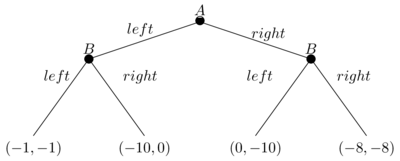

In [44]:
%%tikz

\node [above] at (0.55, 1.1) {$left$};
\node [above] at (5.3, 1.1) {$left$};
\node [above] at (2.5, 2.2) {$left$};
\node [above] at (2.5, 1.1) {$right$};
\node [above] at (5.5, 2.1) {$right$};
\node [above] at (7.5, 1.1) {$right$};


\draw [fill] (1.3, 1.8) circle [radius=0.1] node [above] {$B$};
\draw [fill] (6.5, 1.8) circle [radius=0.1] node [above] {$B$};
\draw [fill = white] (3.9, 2.7) circle [radius=0.1] node [above] {$A$};
\draw (0, 0) node [below] {$(-1,-1)$}-- (1.3, 1.8) -- (3.83, 2.65);
\draw (3.96, 2.65) -- (6.5, 1.8) -- (7.8, 0) node [below] {$(-8,-8)$};
\draw (1.3, 1.8) -- (2.6, 0) node [below] {$(-10,0)$};
\draw (6.5, 1.8) -- (5.2, 0) node [below] {$(0,-10)$};


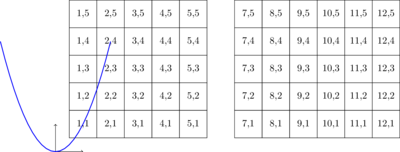

In [45]:
%%tikz -s 400,400 -sc 1 -f png
\foreach \x in {1,2,...,5,7,8,...,12}
\foreach \y in {1,...,5}
{
\draw (\x,\y) +(-.5,-.5) rectangle ++(.5,.5);
\draw (\x,\y) node{\x,\y};
}

\draw [<->] (0,1) -- (0,0) -- (1,0);
\draw[blue,thick, domain=-2:2] plot (\x, {\x*\x});
%https://share.cocalc.com/share/96fd2324ae3de4c1f97ef1a116a87fd0839c3c2b/tikzimpatient.ipynb?viewer=share

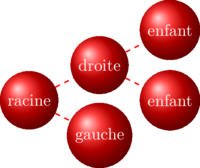

In [46]:
%%tikz -s 200,200 -sc 1 -f png
[parent anchor=east,child anchor=west,grow=right]
\tikzstyle{every node}=[ball color=red,circle,text=white]
\tikzstyle{edge from parent}=[draw,dashed,thick,red]
\node {racine}[grow=right]
child {node {gauche}}
child {node {droite}
child {node {enfant}}
child {node {enfant}}
};
%https://share.cocalc.com/share/96fd2324ae3de4c1f97ef1a116a87fd0839c3c2b/tikzimpatient.ipynb?viewer=share

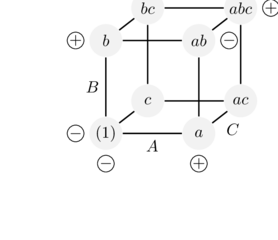

In [47]:
%%tikz 

\tikzset{
  vertex/.style={
    circle, minimum size=20pt, inner sep=0pt, fill=gray!10},
  axial/.style={
    rectangle, minimum size=20pt, inner sep=0pt, fill=gray!30},
  edge/.style={draw,thick,-,black},
  rotu/.style={midway},
  sinal/.style={draw, circle, inner sep=0pt, thin}
}

\def\dist{0.4}
\begin{tikzpicture}[
  scale=2, ->, thick, z={(0.45,0.35)}, node distance=0.65cm]
  \node[vertex] (v0) at (0,0,0) {$(1)$};
  \node[vertex] (v1) at (0,1,0) {$b$};
  \node[vertex] (v2) at (1,0,0) {$a$};
  \node[vertex] (v3) at (1,1,0) {$ab$};
  \node[vertex] (v4) at (0,0,1) {$c$};
  \node[vertex] (v5) at (0,1,1) {$bc$};
  \node[vertex] (v6) at (1,0,1) {$ac$};
  \node[vertex] (v7) at (1,1,1) {$abc$};
  \draw[edge] (v0) -- (v1) node[rotu, left=\dist] {$B$} -- 
    (v3) -- (v2) -- (v0) node[rotu, below=\dist] {$A$};
  \draw[edge] (v0) -- (v4) -- (v5) -- (v1);
  \draw[edge] (v2) -- (v6)
    node[rotu, below right=\dist] {$C$} -- (v7) -- (v3);
  \draw[edge] (v4) -- (v6); \draw[edge] (v5) -- (v7);
  \node[sinal, below of=v0] {$-$};
  \node[sinal, left of=v0] {$-$};
  \node[sinal, left of=v1] {$+$};
  \node[sinal, below of=v2] {$+$};
  \node[sinal, right of=v3] {$-$};
  \node[sinal, right of=v7] {$+$};
\end{tikzpicture}

\def\dist{0.4}
\def\ax{2}
\begin{tikzpicture}[
  scale=2, ->, thick, z={(0.55,0.3)}, node distance=0.65cm]
  \node[vertex, fill=yellow] (c0) at (0,0,0) {$0$};
  \node[vertex] (v0) at (-1,-1,-1) {$(1)$};
  \node[vertex] (v1) at (-1,1,-1) {$b$};
  \node[vertex] (v2) at (1,-1,-1) {$a$};
  \node[vertex] (v3) at (1,1,-1) {$ab$};
  \node[vertex] (v4) at (-1,-1,1) {$c$};
  \node[vertex] (v5) at (-1,1,1) {$bc$};
  \node[vertex] (v6) at (1,-1,1) {$ac$};
  \node[vertex] (v7) at (1,1,1) {$abc$};
  \node[axial] (a1) at (-\ax,0,0) {$W$};
  \node[axial] (a2) at (\ax,0,0) {$W$};
  \node[axial] (a3) at (0,-\ax,0) {$W$};
  \node[axial] (a4) at (0,\ax,0) {$W$};
  \node[axial] (a5) at (0,0,-\ax) {$W$};
  \node[axial] (a6) at (0,0,\ax) {$W$};
  \draw[edge] (v0) -- (v1) node[rotu, left=\dist] {$B$} -- 
    (v3) -- (v2) -- (v0) node[rotu, below=\dist] {$A$};
  \draw[edge] (v0) -- (v4) -- (v5) -- (v1);
  \draw[edge] (v2) -- (v6)
    node[rotu, below right=\dist] {$C$} -- (v7) -- (v3);
  \draw[edge] (v4) -- (v6); \draw[edge] (v5) -- (v7);
  \draw[edge] (a1) -- (c0) --(a2);
  \draw[edge] (a3) -- (c0) --(a4);
  \draw[edge] (a5) -- (c0) --(a6);
  \node[sinal, below of=v0] {$-$};
  \node[sinal, left of=v0] {$-$};
  \node[sinal, left of=v1] {$+$};
  \node[sinal, below of=v2] {$+$};
  \node[sinal, right of=v3] {$-$};
  \node[sinal, right of=v7] {$+$};
\end{tikzpicture}

\begin{tikzpicture}[
  scale=2, ->, thick, z={(0.45,0.35)}, node distance=0.65cm,
  vertex/.style={
    rectangle, minimum size=12pt, inner sep=1pt, fill=gray!10
  }]
  \node[text centered] (title) at (0.7,1.7,0)
    {Rendimento (\%) em um $2^3$};
  \node[vertex] (v0) at (0,0,0) {$54.8$};
  \node[vertex] (v1) at (0,1,0) {$48.0$};
  \node[vertex] (v2) at (1,0,0) {$86.5$};
  \node[vertex] (v3) at (1,1,0) {$63.0$};
  \node[vertex] (v4) at (0,0,1) {$63.0$};
  \node[vertex] (v5) at (0,1,1) {$58.5$};
  \node[vertex] (v6) at (1,0,1) {$93.5$};
  \node[vertex] (v7) at (1,1,1) {$72.0$};
  \draw[edge] (v0) -- (v1)
    node[rotu, rotate=90, yshift=1.2cm] {Catalizador} -- 
    (v3) -- (v2) -- (v0) node[rotu, below=0.9cm] {Temperatura};
  \draw[edge] (v0) -- (v4) -- (v5) -- (v1);
  \draw[edge] (v2) -- (v6)
    node[rotu, rotate=40, yshift=-1cm, xshift=0.5cm]
    {Concentra\c{c}\~ao} -- (v7) -- (v3);
  \draw[edge] (v4) -- (v6); \draw[edge] (v5) -- (v7);
  \node[sinal, below of=v0] {$-$};
  \node[sinal, left of=v0] {$-$};
  \node[sinal, left of=v1] {$+$};
  \node[sinal, below of=v2] {$+$};
  \node[sinal, right of=v3] {$-$};
  \node[sinal, right of=v7] {$+$};
\end{tikzpicture}

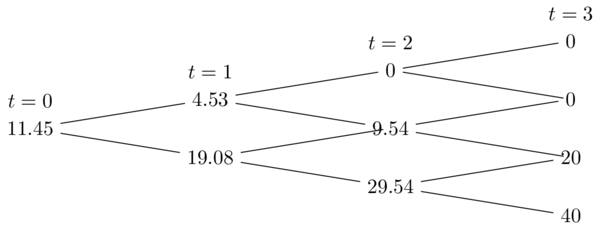

In [48]:
%%tikz -s 600,600 -sc 1  -f png

\node[label=90:{$t=0$}]{11.45}[grow=right, level distance = 31mm, sibling distance = 10mm]
    child {node {19.08} 
        child {node {29.54}
            child {node {40}}
            child {node {20}}
                }
        child {node {}}%<---------------- already printed
            }
    child {node[label=90:{$t=1$}] {4.53}
        child {node {9.54}
            child {node {}}%<------------ already printed
            child {node {0}}
                }
        child {node[label=90:{$t=2$}] {0}
            child {node {}}%<------------ already printed
            child {node[label=90:{$t=3$}] {0}}
                }
                };

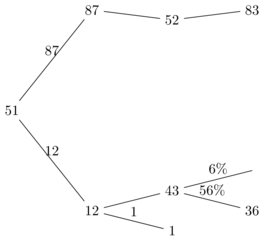

In [49]:
%%tikz


\node {51}[grow=right, level distance =20mm, sibling distance = 50mm]
child {node {12}[sibling distance = 10mm]
       child {node {1} edge from parent node[above]{$1$}}
       child {node {43}
              child {node {36} edge from parent node[above]{$56\%$}}
              child {edge from parent node[above]{$6\%$}}
              }
       edge from parent node[above]{$12$}
       }
child {node {87} [sibling distance = 5mm]
       child {node {52}
              child {edge from parent[draw = none]}
              child {node {83}}
              }
       child {edge from parent[draw = none]}
       edge from parent node[above]{$87$}
       };


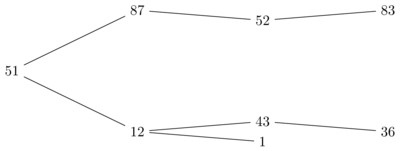

In [50]:
%%tikz

\node {51}[grow=right, level distance = 31mm, sibling distance = 30mm]
child {node {12} [sibling distance = 5mm]
       child {node {1}}
       child {node {43}
              child {node {36}}
              child {edge from parent[draw = none]}
              }
       }
child {node {87} [sibling distance = 5mm]
       child {node {52}
              child {edge from parent[draw = none]}
              child {node {83}}
              }
       child {edge from parent[draw = none]}
       };

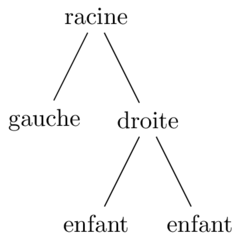

In [51]:
%%tikz
\node {racine}
child {node {gauche}}
child {node {droite}
child {node {enfant}}
child {node {enfant}}
};

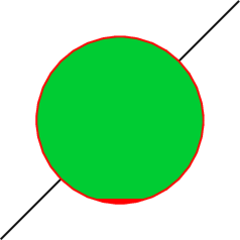

In [52]:
%%tikz 
\draw (-1,-1) -- (1,1);
\path[fill=green!80!blue,draw=red] (0,0) circle (7mm);

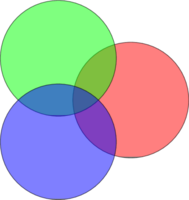

In [53]:
%%tikz -s 200,200 -sc 1  -f png
[thin,fill opacity=1]
\filldraw[fill=red,opacity=0.5]   (0:1cm)    circle (12mm);
\filldraw[fill=green,opacity=0.5] (120:1cm)  circle (12mm);
\filldraw[fill=blue,opacity=0.5]  (-120:1cm) circle (12mm);

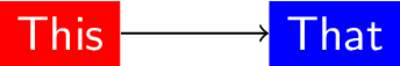

In [54]:
%%tikz
\tikzset{every node/.style={font=\sffamily,white}}
\node[fill=red] at (0,0) (a) {This};
\node[fill=blue] at (2,0) (b) {That};
\draw[->] (a) -- (b);

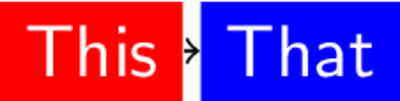

In [55]:
%%tikz --scale=0.5
\tikzset{every node/.style={font=\sffamily,white}}
\node[fill=red] at (0,0) (a) {This};
\node[fill=blue] at (2,0) (b) {That};
\draw[->] (a) -- (b);

In [56]:
%%tikz --scale=3
\tikzset{every node/.style={font=\sffamily,white}}
\node[fill=red] at (0,0) (a) {This};
\node[fill=blue] at (2,0) (b) {That};
\draw[->] (a) -- (b);

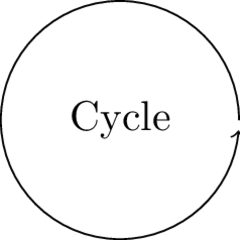

In [57]:
%%tikz
\draw[->] (1,0) arc(0:355:1);
\node {Cycle};

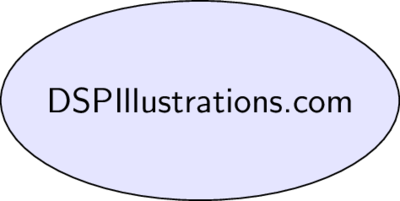

In [58]:
%%tikz
\draw (0,0) [fill=blue!10!white] ellipse (2cm and 1cm);
\node at (0,0) {\sffamily DSPIllustrations.com};

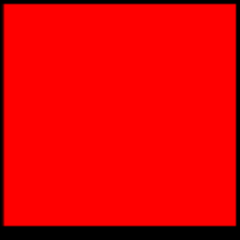

In [59]:
tikz_str = """
\draw[fill=red] (0,0) rectangle (1,1);
"""
%tikz $tikz_str

## collapsible markdown?

<details>
<summary>CLICK ME</summary>

<p>
    
#### yes, even hidden code blocks!

```python
print("hello world!")
```
</p>
</details>

In [60]:
from IPython.display import display, Math, Latex

display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
t = """
\\rho(x,y)\left[
\\begin{array}{cc|c}
1&2&3 \\\\
4&5&6 \\\\
\\end{array} 
\\right]"""
display(Math(t))

t1 ="""
\\left[
\\begin{array}{c} 
x_1 \\\\
x_2 
\\end{array} 
\\right]
=
\\begin{bmatrix} 
A & B \\\\
C & D 
\\end{bmatrix} 
\\times 
\\left[
\\begin{array}{c} 
y_1 \\\\
y_2
\\end{array} 
\\right]
"""
display(Math(t1))

t2="""
\\begin{bmatrix} 
\\Phi_{11} & \\Phi_{12} \\\\ 
\\Phi_{21} & \\Phi_{22} 
\\end{bmatrix}
=
\\frac{1}{\\det(X)}
\\begin{bmatrix}
X_{22} Y_{11} - X_{12} Y_{21} & X_{22} Y_{12} - X_{12} Y_{22} \\\\
X_{11} Y_{21} - X_{21} Y_{11} & X_{11} Y_{22} - X_{21} Y_{12} 
\\end{bmatrix}
"""
display(Math(t2))

t3="""
\\begin{matrix} & \\begin{matrix}A&C&G&T\end{matrix} \\\\
\\begin{matrix}A\\\\C\\\\G\\\\T
\\end{matrix} & \\begin{pmatrix}
1&2&3&4\\\\
3&4&5&6\\\\
3&4&5&6\\\\
3&4&5&6
\\end{pmatrix}\\\\
\\end{matrix}"""
display(Math(t2),Math(t3))
hideMe="Yes" # hide this cell from show in Jupyter notebook

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$$
\begin{array}{c}
\begin{array}{ccccc}\phantom{-1}& H_1 &\phantom{-1}&\phantom{-1}& H_2\end{array} \\
\left[\begin{array}{rrrr|rr}
A &  0 &  0 &  0 & -1 & B \\
0 &  0 & -1 &  0 &  1 & 0 \\
\hline
0 &  0 &  0 & -1 &  1 & 0 \\
0 & -1 &  C &  D &  0 & 0
\end{array}\right] \\
\begin{array}{ccccc}\phantom{-1}& H_3 &\phantom{-1}&\phantom{-1}& H_4\end{array} \\
\end{array}
\begin{array}{cc}
\left[\begin{array}{l}
x_1 \\
x_{10} \\
x_5 \\
x_7 \\
\hline
x_9 \\
x_3
\end{array}\right] &
\!\!\!\!\begin{array}{c}\mathstrut \\ X_1 \\ \mathstrut \\ \mathstrut \\ X_2 \end{array}\!\!\!\!
\end{array}
=0$$

$$
\begin{matrix} %This is the super matrix
    %(1,1) cell: Empty
  &
    %(1,2) cell: Brace spanning columns
    \begin{matrix}   %One-row matrix to hold the brace
      \hphantom{a} & %Blank space to skip over first column
      \overbrace{
        \hphantom{\begin{matrix}b & c & d\end{matrix}}
      }^{\text{Final three columns}}
    \end{matrix}
  \\
    %(2,1) cell: Brace spanning rows
    \begin{matrix}    %One-column matrix to hold a brace
      \vphantom{a} \\ %Blank space to skip first row
      \text{Middle two rows}
        \left\{\vphantom{\begin{matrix} e \\ i \end{matrix}}\right. \\
      \vphantom{m}
    \end{matrix}
    %The inter-column spacing of the super matrix looks too big by default
    \mspace{-33mu}
  &
    %(2,2) cell: Actual matrix
    \begin{pmatrix}
      a & b & c & d \\
      e & f & g & h \\
      i & j & k & l \\
      m & n & o & p
    \end{pmatrix} 
\end{matrix} 
$$

$$
\begin{align}
\text{Probability density function:}\\
\begin{cases}
\frac{1}{b-a}&\text{for $x\in[a,b]$}\\
0&\text{otherwise}\\
\end{cases}
\\
\text{Cumulative distribution function:}\\
\begin{cases}
0&\text{for $x<a$}\\
\frac{x-a}{b-a}&\text{for $x\in[a,b)$}\\
1&\text{for $x\ge b$}\\
\end{cases}
\end{align}
$$

In [62]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
#www='<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>'
www="""<script>
jQuery(function() 
{if(jQuery("body.notebook_app").length == 0) 
   {jQuery(".input_area").toggle(); 
    jQuery(".prompt").toggle();
   }
});
</script>"""
di.display_html(www, raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Everything hide</button>''', raw=True)

"""
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
"""

print("Markdown not work")

Everything hide

Markdown not work


In [61]:
hideMe="Yes" # hide this cell from show in Jupyter notebook
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el_last = $(this).find('.cm-variable:last');
      el_first = $(this).find('.cm-variable:first');
      eltikz = $(this).find('.cm-variable:first');
      if(id == 0 || el_last.text() == 'hideMe' || el_first.text() == 'hideMe')
        {$(this).hide();}
      if(id == 0 || eltikz.text() == 'tikz') 
        {$(this).hide();}
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {$(this).show(); });
    $('div.output_prompt').css('opacity', 1);
    $('.input_area').show();
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')